<a href="https://colab.research.google.com/github/Sathwik003/Determining_EV_Charging_Stattion_Requirement/blob/main/Group_Project_2_EV_Charging_Stations.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Group Project #2: EV Charging Stations (Spring 2022)
--------------------------------------------------------------------------------
**Dr. Dave Wanik - OPIM 5512: Data Science Using Python - University of Connecticut**


Group 12

*   Jacinth Attada
*   Kurtis Mudre
*   Sathwik Pendyala
*   Yun-Ting Yuan



# Introduction (5 pts)

  The purpose of our project is to use a variety of variables to classify if a zip code has an electric vehicle charging station and how many are located within each zip code. 
  
  The importance of this project stems from the increasing demand for electric vehicles as the United States makes efforts to reduce its carbon footprint and the infrustructure demands that are a result. Figure 1 **[1]** shows the culmative number of electric vehicle sales, which in December of 2011 was less than 50,000, but by the end of December 2021 had climbed to just over 2.5 million electric car sales. Edelstein's article **[2]** *Study: Two-thirds of Americans don't want an EV yet, and half won't pay extra for electrified*, states 69% of Americans are not ready to make the switch to electric vehicles today because of the cost of electric vehicles and concerns about their range. The article later references a Deloitte study, which results stated that seven out of ten Americans see electric vehicles within their future. Over time, the continued investment in the technology within electric vehicles will help to lower prices and improve the range of the vehicles. With this continued increase in the number of electric vehicles hitting the road there is a need to create an infrustructure to support the United States moving towards a greener future. According to Beth Burmahl's article **[3]** *Estimating the economic impact of electric vehicle charging stations*, "...the administration rolls out its plan to build a neetwork of 500,000 electric charging stations across the nation by the end of the decade, the number of charging stations will increase significantly - and quickly." To put things in perspective, the article states that we currently only have 52,000 charging stations nationwide. We can expect a 10x increase in our current number over the next decade.

  Given the increasing national need for electric vehicle charging stations, the value provided by this project is identifying where and how many charging stations should be built per zip code. With this information, the government will be able to efficiently build an infrustucture that can successfully support the increasing demands for electric vehicle charging stations.

**Figure 1 (Argonne National Laboratory - https://www.anl.gov/es/light-duty-electric-drive-vehicles-monthly-sales-updates) :**
![Cumulative U.S. Plug-In Vehicle Sales](https://www.anl.gov/sites/www/files/figure2-cumulativeUS-PlugInVehicleSales-March22.png)

# Import Modules

In [ ]:
# Importing pandas module
import pandas as pd
# Importing numpy module
import numpy as np
# Importing matplotlib module
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib.pyplot import figure
from pylab import *

# model evaluation
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import cross_val_score
from sklearn.metrics import median_absolute_error
from sklearn.metrics import accuracy_score
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import r2_score

# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.decomposition import PCA
from sklearn.pipeline import Pipeline

# simple spotcheck models
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.svm import SVR

# more advanced ensemble models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.decomposition import PCA
# error metrics
from sklearn.metrics import mean_squared_error
import warnings

# Import the Data

In [ ]:
# mount your google drive
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
# Reading the data
df_CS = pd.read_csv('/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/chargingStations.csv')

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (6,10,14,15,16,20,31,33,34,35,36,43,46,49,52,53,57,58,59,60,61,62,63) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
# Printing the shape of data
print('Shape of Data (Rows, Columns):',df_CS.shape)

Shape of Data (Rows, Columns): (57552, 65)


In [ ]:
# Change the datatype
df_CS['ZIP'] = df_CS['ZIP'].astype(str)
# add zero padding to make sure we have right zip codes
df_CS['ZIP'] = df_CS['ZIP'].apply(lambda x: x.zfill(5))

In [ ]:
# head
df_CS.head()

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,MD,NaN,NaN,NaN
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,NaN,Q,3600,MD,NaN,NaN,NaN
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,NaN,Q,3000,LD,NaN,NaN,NaN
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,NaN,B,3600,HD,NaN,NaN,NaN
4,CNG,Clean Energy - Texas Department of Transportation,7721A Washington St,"I-10, Washington Ave exit, 1.5 blocks to the s...",Houston,TX,77007,NaN,866-809-4869,E,...,NaN,NaN,NaN,NaN,Q,3000 3600,MD,NaN,NaN,NaN


In [ ]:
# Getting info of the dataframe
df_CS.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 57552 entries, 0 to 57551
Data columns (total 65 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   Fuel Type Code                    57552 non-null  object 
 1   Station Name                      57552 non-null  object 
 2   Street Address                    57550 non-null  object 
 3   Intersection Directions           4879 non-null   object 
 4   City                              57552 non-null  object 
 5   State                             57552 non-null  object 
 6   ZIP                               57552 non-null  object 
 7   Plus4                             0 non-null      float64
 8   Station Phone                     53105 non-null  object 
 9   Status Code                       57552 non-null  object 
 10  Expected Date                     392 non-null    object 
 11  Groups With Access Code           57552 non-null  object 
 12  Acce

In [ ]:
# Making copy of main dataset
df_copy = df_CS

In [ ]:
df_copy.shape

(57552, 65)

In [ ]:
# copying the dataset
df_dummy = df_CS

In [ ]:
# creating a set of dummy variables for the Fuel Type Column
dummies = pd.get_dummies(df_dummy['Fuel Type Code'])

In [ ]:
# concatenating the dummy variables and the dataset
pd.concat([df_dummy, dummies], axis=1)

,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access,BD,CNG,E85,ELEC,HY,LNG,LPG
0,CNG,Spire - Montgomery Operations Center,2951 Chestnut St,NaN,Montgomery,AL,36107,NaN,NaN,E,...,NaN,NaN,NaN,0,1,0,0,0,0,0
1,CNG,PS Energy - Atlanta,340 Whitehall St,"From I-7585 N, exit 91 to Central Ave, left on...",Atlanta,GA,30303,NaN,770-350-3000,E,...,NaN,NaN,NaN,0,1,0,0,0,0,0
2,CNG,Metropolitan Atlanta Rapid Transit Authority,2424 Piedmont Rd NE,NaN,Atlanta,GA,30324,NaN,NaN,E,...,NaN,NaN,NaN,0,1,0,0,0,0,0
3,CNG,United Parcel Service,270 Marvin Miller Dr,NaN,Atlanta,GA,30336,NaN,NaN,E,...,NaN,NaN,NaN,0,1,0,0,0,0,0
4,CNG,Clean Energy - Texas Department of Transportation,7721A Washington St,"I-10, Washington Ave exit, 1.5 blocks to the s...",Houston,TX,77007,NaN,866-809-4869,E,...,NaN,NaN,NaN,0,1,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
57547,ELEC,Depot Village Apartments,171 Phillips Street,NaN,Hanson,MA,02341,NaN,800-663-5633,E,...,NaN,NaN,NaN,0,0,0,1,0,0,0
57548,ELEC,STADIUM LOFTS EV CHARGER 01,1801 E Katella Ave,NaN,Anaheim,CA,92805,NaN,888-758-4389,E,...,NaN,NaN,NaN,0,0,0,1,0,0,0
57549,ELEC,STATEOFUTDAS PROVORGNLCTR6,150 E 100 S St,NaN,Provo,UT,84606,NaN,888-758-4389,E,...,NaN,NaN,NaN,0,0,0,1,0,0,0
57550,ELEC,TSRC LODGE,5218 Patrick Rd,NaN,Verona,NY,13478,NaN,888-758-4389,E,...,NaN,NaN,NaN,0,0,0,1,0,0,0


# EV Dataframe

Main objective of this project is to predict the EV charging stations in a Zip code

In [ ]:
# Subsetting the ELEC from the main dataframe
df_EV = df_copy.loc[df_copy['Fuel Type Code'] == 'ELEC']

In [ ]:
# Checking the shape of the dataframe
print(df_EV.shape)
df_EV.head() #Printing the first 5 rows to check the data

(47860, 65)


,Fuel Type Code,Station Name,Street Address,Intersection Directions,City,State,ZIP,Plus4,Station Phone,Status Code,...,EV Pricing (French),LPG Nozzle Types,Hydrogen Pressures,Hydrogen Standards,CNG Fill Type Code,CNG PSI,CNG Vehicle Class,LNG Vehicle Class,EV On-Site Renewable Source,Restricted Access
164,ELEC,LADWP - Truesdale Center,11797 Truesdale St,NaN,Sun Valley,CA,91352,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
165,ELEC,LADWP - West LA District Office,1394 S Sepulveda Blvd,NaN,Los Angeles,CA,90024,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
166,ELEC,Southern California Edison - Rosemead Office B...,2244 Walnut Grove Ave,NaN,Rosemead,CA,91770,NaN,NaN,T,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
167,ELEC,Los Angeles Convention Center,1201 S Figueroa St,West hall and South hall,Los Angeles,CA,90015,NaN,213-741-1151,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
168,ELEC,LADWP - John Ferraro Building,111 N Hope St,Across Hope,Los Angeles,CA,90012,NaN,NaN,E,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# External Datasets (10 pts)

## External Dataset 1

Dataset : Median income in year 2020 by zipcode

https://data.census.gov/cedsci/table?q=median%20income&g=0100000US%248600000&y=2020&tid=ACSST5Y2020.S1903&moe=false

### Import the External Datasets

In [ ]:
MD_2020 = pd.read_csv("/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/ACSST5Y2020.S1903_data_with_overlays_2022-03-17T134554.csv")

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,73,74,75,76,77,78,79,80,81,82,83,110,111,148,149) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
MD_2020.shape

(33121, 242)

In [ ]:
MD_2020.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Columns: 242 entries, GEO_ID to S1903_C03_040M
dtypes: object(242)
memory usage: 61.2+ MB


In [ ]:
MD_2020.columns.tolist()

['GEO_ID',
 'NAME',
 'S1903_C01_001E',
 'S1903_C01_001M',
 'S1903_C01_002E',
 'S1903_C01_002M',
 'S1903_C01_003E',
 'S1903_C01_003M',
 'S1903_C01_004E',
 'S1903_C01_004M',
 'S1903_C01_005E',
 'S1903_C01_005M',
 'S1903_C01_006E',
 'S1903_C01_006M',
 'S1903_C01_007E',
 'S1903_C01_007M',
 'S1903_C01_008E',
 'S1903_C01_008M',
 'S1903_C01_009E',
 'S1903_C01_009M',
 'S1903_C01_010E',
 'S1903_C01_010M',
 'S1903_C01_011E',
 'S1903_C01_011M',
 'S1903_C01_012E',
 'S1903_C01_012M',
 'S1903_C01_013E',
 'S1903_C01_013M',
 'S1903_C01_014E',
 'S1903_C01_014M',
 'S1903_C01_015E',
 'S1903_C01_015M',
 'S1903_C01_016E',
 'S1903_C01_016M',
 'S1903_C01_017E',
 'S1903_C01_017M',
 'S1903_C01_018E',
 'S1903_C01_018M',
 'S1903_C01_019E',
 'S1903_C01_019M',
 'S1903_C01_020E',
 'S1903_C01_020M',
 'S1903_C01_021E',
 'S1903_C01_021M',
 'S1903_C01_022E',
 'S1903_C01_022M',
 'S1903_C01_023E',
 'S1903_C01_023M',
 'S1903_C01_024E',
 'S1903_C01_024M',
 'S1903_C01_025E',
 'S1903_C01_025M',
 'S1903_C01_026E',
 'S1903_C01

In [ ]:
# # Drop the columns we do not want to use
source_1 = MD_2020.drop(columns=[
 'S1903_C01_001E',
 'S1903_C01_001M',
 'S1903_C01_002E',
 'S1903_C01_002M',
 'S1903_C01_003E',
 'S1903_C01_003M',
 'S1903_C01_004E',
 'S1903_C01_004M',
 'S1903_C01_005E',
 'S1903_C01_005M',
 'S1903_C01_006E',
 'S1903_C01_006M',
 'S1903_C01_007E',
 'S1903_C01_007M',
 'S1903_C01_008E',
 'S1903_C01_008M',
 'S1903_C01_009E',
 'S1903_C01_009M',
 'S1903_C01_010E',
 'S1903_C01_010M',
 'S1903_C01_016E',
 'S1903_C01_016M',
 'S1903_C01_017E',
 'S1903_C01_017M',
 'S1903_C01_018E',
 'S1903_C01_018M',
 'S1903_C01_019E',
 'S1903_C01_019M',
 'S1903_C01_020E',
 'S1903_C01_020M',
 'S1903_C01_021E',
 'S1903_C01_021M',
 'S1903_C01_022E',
 'S1903_C01_022M',
 'S1903_C01_023E',
 'S1903_C01_023M',
 'S1903_C01_024E',
 'S1903_C01_024M',
 'S1903_C01_025E',
 'S1903_C01_025M',
 'S1903_C01_026E',
 'S1903_C01_026M',
 'S1903_C01_027E',
 'S1903_C01_027M',
 'S1903_C01_028E',
 'S1903_C01_028M',
 'S1903_C01_029E',
 'S1903_C01_029M',
 'S1903_C01_030E',
 'S1903_C01_030M',
 'S1903_C01_031E',
 'S1903_C01_031M',
 'S1903_C01_032E',
 'S1903_C01_032M',
 'S1903_C01_033E',
 'S1903_C01_033M',
 'S1903_C01_034E',
 'S1903_C01_034M',
 'S1903_C01_035E',
 'S1903_C01_035M',
 'S1903_C01_036E',
 'S1903_C01_036M',
 'S1903_C01_037E',
 'S1903_C01_037M',
 'S1903_C01_038E',
 'S1903_C01_038M',
 'S1903_C01_039E',
 'S1903_C01_039M',
 'S1903_C01_040E',
 'S1903_C01_040M',
 'S1903_C02_001E',
 'S1903_C02_001M',
 'S1903_C02_002E',
 'S1903_C02_002M',
 'S1903_C02_003E',
 'S1903_C02_003M',
 'S1903_C02_004E',
 'S1903_C02_004M',
 'S1903_C02_005E',
 'S1903_C02_005M',
 'S1903_C02_006E',
 'S1903_C02_006M',
 'S1903_C02_007E',
 'S1903_C02_007M',
 'S1903_C02_008E',
 'S1903_C02_008M',
 'S1903_C02_009E',
 'S1903_C02_009M',
 'S1903_C02_010E',
 'S1903_C02_010M',
 'S1903_C02_011E',
 'S1903_C02_011M',
 'S1903_C02_012E',
 'S1903_C02_012M',
 'S1903_C02_013E',
 'S1903_C02_013M',
 'S1903_C02_014E',
 'S1903_C02_014M',
 'S1903_C02_015E',
 'S1903_C02_015M',
 'S1903_C02_016E',
 'S1903_C02_016M',
 'S1903_C02_017E',
 'S1903_C02_017M',
 'S1903_C02_018E',
 'S1903_C02_018M',
 'S1903_C02_019E',
 'S1903_C02_019M',
 'S1903_C02_020E',
 'S1903_C02_020M',
 'S1903_C02_021E',
 'S1903_C02_021M',
 'S1903_C02_022E',
 'S1903_C02_022M',
 'S1903_C02_023E',
 'S1903_C02_023M',
 'S1903_C02_024E',
 'S1903_C02_024M',
 'S1903_C02_025E',
 'S1903_C02_025M',
 'S1903_C02_026E',
 'S1903_C02_026M',
 'S1903_C02_027E',
 'S1903_C02_027M',
 'S1903_C02_028E',
 'S1903_C02_028M',
 'S1903_C02_029E',
 'S1903_C02_029M',
 'S1903_C02_030E',
 'S1903_C02_030M',
 'S1903_C02_031E',
 'S1903_C02_031M',
 'S1903_C02_032E',
 'S1903_C02_032M',
 'S1903_C02_033E',
 'S1903_C02_033M',
 'S1903_C02_034E',
 'S1903_C02_034M',
 'S1903_C02_035E',
 'S1903_C02_035M',
 'S1903_C02_036E',
 'S1903_C02_036M',
 'S1903_C02_037E',
 'S1903_C02_037M',
 'S1903_C02_038E',
 'S1903_C02_038M',
 'S1903_C02_039E',
 'S1903_C02_039M',
 'S1903_C02_040E',
 'S1903_C02_040M',
 'S1903_C03_001E',
 'S1903_C03_001M',
 'S1903_C03_002E',
 'S1903_C03_002M',
 'S1903_C03_003E',
 'S1903_C03_003M',
 'S1903_C03_004E',
 'S1903_C03_004M',
 'S1903_C03_005E',
 'S1903_C03_005M',
 'S1903_C03_006E',
 'S1903_C03_006M',
 'S1903_C03_007E',
 'S1903_C03_007M',
 'S1903_C03_008E',
 'S1903_C03_008M',
 'S1903_C03_009E',
 'S1903_C03_009M',
 'S1903_C03_010E',
 'S1903_C03_010M',
 'S1903_C03_011E',
 'S1903_C03_011M',
 'S1903_C03_012E',
 'S1903_C03_012M',
 'S1903_C03_013E',
 'S1903_C03_013M',
 'S1903_C03_014E',
 'S1903_C03_014M',
 'S1903_C03_015E',
 'S1903_C03_015M',
 'S1903_C03_016E',
 'S1903_C03_016M',
 'S1903_C03_017E',
 'S1903_C03_017M',
 'S1903_C03_018E',
 'S1903_C03_018M',
 'S1903_C03_019E',
 'S1903_C03_019M',
 'S1903_C03_020E',
 'S1903_C03_020M',
 'S1903_C03_021E',
 'S1903_C03_021M',
 'S1903_C03_022E',
 'S1903_C03_022M',
 'S1903_C03_023E',
 'S1903_C03_023M',
 'S1903_C03_024E',
 'S1903_C03_024M',
 'S1903_C03_025E',
 'S1903_C03_025M',
 'S1903_C03_026E',
 'S1903_C03_026M',
 'S1903_C03_027E',
 'S1903_C03_027M',
 'S1903_C03_028E',
 'S1903_C03_028M',
 'S1903_C03_029E',
 'S1903_C03_029M',
 'S1903_C03_030E',
 'S1903_C03_030M',
 'S1903_C03_031E',
 'S1903_C03_031M',
 'S1903_C03_032E',
 'S1903_C03_032M',
 'S1903_C03_033E',
 'S1903_C03_033M',
 'S1903_C03_034E',
 'S1903_C03_034M',
 'S1903_C03_035E',
 'S1903_C03_035M',
 'S1903_C03_036E',
 'S1903_C03_036M',
 'S1903_C03_037E',
 'S1903_C03_037M',
 'S1903_C03_038E',
 'S1903_C03_038M',
 'S1903_C03_039E',
 'S1903_C03_039M',
 'S1903_C03_040E',
 'S1903_C03_040M'])
source_1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 12 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO_ID          33121 non-null  object
 1   NAME            33121 non-null  object
 2   S1903_C01_011E  33121 non-null  object
 3   S1903_C01_011M  33121 non-null  object
 4   S1903_C01_012E  33121 non-null  object
 5   S1903_C01_012M  33121 non-null  object
 6   S1903_C01_013E  33121 non-null  object
 7   S1903_C01_013M  33121 non-null  object
 8   S1903_C01_014E  33121 non-null  object
 9   S1903_C01_014M  33121 non-null  object
 10  S1903_C01_015E  33121 non-null  object
 11  S1903_C01_015M  33121 non-null  object
dtypes: object(12)
memory usage: 3.0+ MB


In [ ]:
# # Drop the columns we do not want to use
source1= source_1.drop(columns=[
 'S1903_C01_011M',
 'S1903_C01_012M',
 'S1903_C01_013M',
 'S1903_C01_014M',
 'S1903_C01_015M'])
source1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33121 entries, 0 to 33120
Data columns (total 7 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   GEO_ID          33121 non-null  object
 1   NAME            33121 non-null  object
 2   S1903_C01_011E  33121 non-null  object
 3   S1903_C01_012E  33121 non-null  object
 4   S1903_C01_013E  33121 non-null  object
 5   S1903_C01_014E  33121 non-null  object
 6   S1903_C01_015E  33121 non-null  object
dtypes: object(7)
memory usage: 1.8+ MB


In [ ]:
source1.rename(columns={'S1903_C01_011E': 'Number of Household Income by 15 to 24 years', 
                        'S1903_C01_012E': 'Number of Household Income by 25 to 44 years', 
                        'S1903_C01_013E':'Number of Household Income by 45 to 64 years',
                        'S1903_C01_014E':'Number of Household Income over 65 years',
                        'S1903_C01_015E': 'Number of Families' }, inplace=True)

In [ ]:
source1.columns.tolist()

['GEO_ID',
 'NAME',
 'Number of Household Income by 15 to 24 years',
 'Number of Household Income by 25 to 44 years',
 'Number of Household Income by 45 to 64 years',
 'Number of Household Income over 65 years',
 'Number of Families']

In [ ]:
source1.head()

,GEO_ID,NAME,Number of Household Income by 15 to 24 years,Number of Household Income by 25 to 44 years,Number of Household Income by 45 to 64 years,Number of Household Income over 65 years,Number of Families
0,id,Geographic Area Name,Estimate!!Number!!HOUSEHOLD INCOME BY AGE OF H...,Estimate!!Number!!HOUSEHOLD INCOME BY AGE OF H...,Estimate!!Number!!HOUSEHOLD INCOME BY AGE OF H...,Estimate!!Number!!HOUSEHOLD INCOME BY AGE OF H...,Estimate!!Number!!FAMILIES!!Families
1,8600000US00601,ZCTA5 00601,91,1332,2286,1846,3912
2,8600000US00602,ZCTA5 00602,89,2475,5602,4735,9194
3,8600000US00603,ZCTA5 00603,730,5116,6849,6736,13168
4,8600000US00606,ZCTA5 00606,19,325,851,788,1351


In [ ]:
source1 = source1.iloc[1: , :]

In [ ]:
source1.head()

,GEO_ID,NAME,Number of Household Income by 15 to 24 years,Number of Household Income by 25 to 44 years,Number of Household Income by 45 to 64 years,Number of Household Income over 65 years,Number of Families
1,8600000US00601,ZCTA5 00601,91,1332,2286,1846,3912
2,8600000US00602,ZCTA5 00602,89,2475,5602,4735,9194
3,8600000US00603,ZCTA5 00603,730,5116,6849,6736,13168
4,8600000US00606,ZCTA5 00606,19,325,851,788,1351
5,8600000US00610,ZCTA5 00610,92,2016,3281,3475,6305


In [ ]:
# Deleting the first row of the dataframe
source1 = source1.iloc[1: , :]

In [ ]:
# First five rows of the dataset
source1.head()

,GEO_ID,NAME,Number of Household Income by 15 to 24 years,Number of Household Income by 25 to 44 years,Number of Household Income by 45 to 64 years,Number of Household Income over 65 years,Number of Families
2,8600000US00602,ZCTA5 00602,89,2475,5602,4735,9194
3,8600000US00603,ZCTA5 00603,730,5116,6849,6736,13168
4,8600000US00606,ZCTA5 00606,19,325,851,788,1351
5,8600000US00610,ZCTA5 00610,92,2016,3281,3475,6305
6,8600000US00612,ZCTA5 00612,616,6183,8399,8129,15576


In [ ]:
# Extracting the Zipcode from the NAME column
source1['ZipCode'] = source1['NAME'].str.replace('ZCTA5', '')

### Simple Data Cleaniing

Drop the columns we do not want to use

In [ ]:
# Removing the unnecessary columns
del source1['NAME']
del source1['GEO_ID']

In [ ]:
# First five rows of dataframe
source1.head()

,Number of Household Income by 15 to 24 years,Number of Household Income by 25 to 44 years,Number of Household Income by 45 to 64 years,Number of Household Income over 65 years,Number of Families,ZipCode
2,89,2475,5602,4735,9194,00602
3,730,5116,6849,6736,13168,00603
4,19,325,851,788,1351,00606
5,92,2016,3281,3475,6305,00610
6,616,6183,8399,8129,15576,00612


In [ ]:
source1['Number of Families'] = pd.to_numeric(source1['Number of Families'])
source1['Number of Household Income by 15 to 24 years'] = pd.to_numeric(source1['Number of Household Income by 15 to 24 years'])
source1['Number of Household Income by 25 to 44 years'] = pd.to_numeric(source1['Number of Household Income by 25 to 44 years'])
source1['Number of Household Income by 45 to 64 years'] = pd.to_numeric(source1['Number of Household Income by 45 to 64 years'])
source1['Number of Household Income over 65 years'] = pd.to_numeric(source1['Number of Household Income over 65 years'])


In [ ]:
source1.sort_values(by='ZipCode', inplace=True)

In [ ]:
# found the whitespace
pd.unique(source1['ZipCode'])

array([' 00602', ' 00603', ' 00606', ..., ' 99926', ' 99927', ' 99929'],
      dtype=object)

In [ ]:
source1['ZipCode'] = source1['ZipCode'].str.strip()

In [ ]:
source1.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 33119 entries, 2 to 33120
Data columns (total 6 columns):
 #   Column                                        Non-Null Count  Dtype 
---  ------                                        --------------  ----- 
 0   Number of Household Income by 15 to 24 years  33119 non-null  int64 
 1   Number of Household Income by 25 to 44 years  33119 non-null  int64 
 2   Number of Household Income by 45 to 64 years  33119 non-null  int64 
 3   Number of Household Income over 65 years      33119 non-null  int64 
 4   Number of Families                            33119 non-null  int64 
 5   ZipCode                                       33119 non-null  object
dtypes: int64(5), object(1)
memory usage: 1.8+ MB


### Data Source Description




**Jacinth: ‘Median income in year 2020 by zipcode’ - [Dataset Link](https://data.census.gov/cedsci/table?q=median%20income&g=0100000US%248600000&y=2020&tid=ACSST5Y2020.S1903&moe=false)**

Plain explanation of the datasource and the columns/data types

*   Column 1: ZipCode (Zipcode of each area) 
*   Column 2: Number of Families (Number of Families residing in specific Zipcode)
*   Column 3: Number of Household Income by 15 to 24 years (Number of people earning between age 15 and 24 years)
*   Column 4: Number of Household Income by 25 to 44 years (Number of people earning between age 25 and 44 years)
*   Column 5: Number of Household Income by 45 to 64 years (Number of people earning between age 45 and 64 years)
*   Column 6: Number of Household Income over 65 years (Number of people earning between age over 65 years)


## External Dataset 2

### Import the External Datasets

In [ ]:
# importing data set and changing the zipcode datatype to string because it is a categorical column
IRS_2019 = pd.io.parsers.read_csv('/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/2019 IRS Data.csv', dtype={'zipcode': 'str'})
# IRS_2019

### Simple Data Cleaniing

Drop the columns we do not want to use

In [ ]:
# adding the 0's that were lost within the import of the data set to the front of the zip codes.
IRS_2019['zipcode'] = IRS_2019['zipcode'].str.zfill(5)
#IRS_2019.head() #check

In [ ]:
# printing all of the columns to copy and paste within the groupby function to avoid the typing of every column
print(IRS_2019.columns.values.tolist())

['STATEFIPS', 'STATE', 'zipcode', 'agi_stub', 'N1', 'mars1', 'MARS2', 'MARS4', 'ELF', 'CPREP', 'PREP', 'DIR_DEP', 'N2', 'TOTAL_VITA', 'VITA', 'TCE', 'VITA_EIC', 'RAC', 'ELDERLY', 'A00100', 'N02650', 'A02650', 'N00200', 'A00200', 'N00300', 'A00300', 'N00600', 'A00600', 'N00650', 'A00650', 'N00700', 'A00700', 'N00900', 'A00900', 'N01000', 'A01000', 'N01400', 'A01400', 'N01700', 'A01700', 'SCHF', 'N02300', 'A02300', 'N02500', 'A02500', 'N26270', 'A26270', 'N02900', 'A02900', 'N03220', 'A03220', 'N03300', 'A03300', 'N03270', 'A03270', 'N03150', 'A03150', 'N03210', 'A03210', 'N04450', 'A04450', 'N04100', 'A04100', 'N04200', 'A04200', 'N04470', 'A04470', 'A00101', 'N17000', 'A17000', 'N18425', 'A18425', 'N18450', 'A18450', 'N18500', 'A18500', 'N18800', 'A18800', 'N18460', 'A18460', 'N18300', 'A18300', 'N19300', 'A19300', 'N19500', 'A19500', 'N19530', 'A19530', 'N19570', 'A19570', 'N19700', 'A19700', 'N20950', 'A20950', 'N04475', 'A04475', 'N04800', 'A04800', 'N05800', 'A05800', 'N09600', 'A0

In [ ]:
# grouping the dataset by the 'zipcode' column becuase there were 6 rows per zip code referring to each adjusted gross income bracket, these brackets were combined and the values were summed together to represent each zipcode with a single value per column
IRS_2019_No_AGI = IRS_2019.groupby('zipcode')['N1', 'mars1', 
                                             'MARS2', 'MARS4', 
                                             'N2', 'ELDERLY',
                                             'N02650', 'A02650', 
                                             'N00200', 'A00200', 
                                             'N01000', 'A01000', 
                                             'SCHF', 'N02300',
                                             'N03210', 'N18500',
                                             'N07180', 'N07240',
                                             'N07260'].sum()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


In [ ]:
# adjusting the index because after the groupby the zipcode set as the new index
IRS_2019_No_AGI.reset_index(inplace=True)

In [ ]:
# renaming the columns
IRS_2019_No_AGI.rename(columns={'zipcode':'Zipcode',
                                'N1':'Total_Returns', 
                                'mars1':'Single_Returns', 
                                'MARS2':'Joint_Returns', 
                                'MARS4':'HeadOfHouse_Returns', 
                                'N2':'Individuals', 
                                'ELDERLY':'Elderly_Returns',
                                'N02650':'Total_Income_Returns', 
                                'A02650':'Total_Income_Amount', 
                                'N00200':'Salary/Wages_Returns', 
                                'A00200':'Salary/Wages_Amount', 
                                'N01000':'Net_Capital_Gain_Returns', 
                                'A01000':'Net_Capital_Gain_Amount', 
                                'SCHF':'Farm_Returns', 
                                'N02300':'Unemployment_Compensation_Returns',
                                'N03210':'Student_Loan_Interest_Deduction_Returns', 
                                'N18500':'Real_Estate_Returns',
                                'N07180':'Child/Dependent_Care_Returns', 
                                'N07240':'Retirement_Contributions_Returns',
                                'N07260':'Residential_Energy_Tax_Credit_Returns'},inplace=True)

In [ ]:
# dropping the area codes that have been originally inputted as '0' and '99999'
IRS_2019_No_AGI.drop(IRS_2019_No_AGI[IRS_2019_No_AGI['Zipcode'] == '00000'].index, inplace=True)
IRS_2019_No_AGI.drop(IRS_2019_No_AGI[IRS_2019_No_AGI['Zipcode'] == '99999'].index, inplace=True)

In [ ]:
# sorting zipcodes and verifying that front loaded 0's for 5-digit formatting are there
IRS_2019_No_AGI.sort_values(by='Zipcode', inplace=True)
#df_IRS[0:50] #check

In [ ]:
# final check of data set
IRS_2019_No_AGI.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27593 entries, 1 to 27593
Data columns (total 20 columns):
 #   Column                                   Non-Null Count  Dtype  
---  ------                                   --------------  -----  
 0   Zipcode                                  27593 non-null  object 
 1   Total_Returns                            27593 non-null  int64  
 2   Single_Returns                           27593 non-null  int64  
 3   Joint_Returns                            27593 non-null  int64  
 4   HeadOfHouse_Returns                      27593 non-null  int64  
 5   Individuals                              27593 non-null  int64  
 6   Elderly_Returns                          27593 non-null  int64  
 7   Total_Income_Returns                     27593 non-null  int64  
 8   Total_Income_Amount                      27593 non-null  float64
 9   Salary/Wages_Returns                     27593 non-null  int64  
 10  Salary/Wages_Amount                      27593

In [ ]:
# renaming finalized data set for easier future use
source2 = IRS_2019_No_AGI
#source2 #check

In [ ]:
source2.shape

(27593, 20)

### Data Source Description

**Kurtis: 'SOI Tax Stats - Individual Income Tax Statistics - 2019 ZIP Code Data (SOI)' - https://www.irs.gov/statistics/soi-tax-stats-individual-income-tax-statistics-2019-zip-code-data-soi**

The Statistics of Income (SOI) Division’s ZIP code data is tabulated using individual income tax returns (Forms 1040) filed with the Internal Revenue Service (IRS) during the 12-month period, January 1, 2020 to December 31, 2020. Upon completion of data cleaning the final dataset contains 27,593 rows and 20 columns. 

**Data loss within this dataset occurs due to disclosure protection procedures within the following ways:**
* Zip codes with less than 100 returns and those identified as a single building or nonresidential ZIP code were categorized as “other” (99999) and were '99999' was removed from the dataset.
* A zip code of '0' was used for unknown reason spanning across multiple states and those records were removed from the dataset.
* Income and tax items with less than 20 returns within a ZIP code were excluded.
* Tax returns with a negative adjusted gross income were excluded.
* If an income or tax item from one return constitutes more than a specified percentage of the total of any particular cell, the specific data item for that return is excluded from that cell.  For example, if the amount for wages from one return represents 75 percent of the value of the total for that cell, the data item will be suppressed. The actual threshold percentage used cannot be released.   

**Data Dictionary:**
*   ***Zipcode:***	5-digit Zip code
*   ***Total_Returns:***	Number of returns
*   ***Single_Returns:***	Number of single returns
*   ***Joint_Returns:***	Number of joint returns
*   ***HeadOfHouse_Returns:***	Number of head of household returns
*   ***Individuals:***	Number of individuals
*   ***Elderly:***	Number of elderly returns (60 years of age and older)
*  ***Total_Income_Returns:***	Number of returns with total income
*  ***Total_Income_Amount:***	Total income amount
*  ***Salary/Wages_Returns:***	Number of returns with salaries and wages
*  ***Salary/Wages_Amount:***	Salaries and wages amount
*  ***Farm_Returns:***	Number of farm returns
*  ***Unemployment_Compensation_Returns:***	Number of returns with unemployment compensation
*  ***Student_Loan_Interest_Deduction_Returns:***	Number of returns with student loan interest deduction
*  ***Real_Estate_Returns:***	Number of returns with real estate taxes
*  ***Child/Dependent_Care_Returns:***	Number of returns with child and dependent care credit
*  ***Retirement_Contributions_Returns:***	Number of returns with retirement savings contribution credit
*  ***Residential_Energy_Tax_Credit_Returns:***	Number of returns with residential energy tax credit


## External Dataset 3

### Import the External Datasets

In [ ]:
# Reading source 3 data
source3_1 = pd.read_csv('/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/iou_zipcodes_2019 .csv', dtype={'zip': 'str'})
source3_2 = pd.read_csv('/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/non_iou_zipcodes_2019 .csv', dtype={'zip': 'str'})

In [ ]:
# source3 = pd.merge(source3_1, source3_2)
source3 = source3_1.append(source3_2)

In [ ]:
source3['zip'] = source3['zip'].str.zfill(5)

In [ ]:
source3_1.shape

(52246, 9)

In [ ]:
source3_2.shape

(36494, 9)

In [ ]:
source3

,zip,eiaid,utility_name,state,service_type,ownership,comm_rate,ind_rate,res_rate
0,85321,176,Ajo Improvement Co,AZ,Bundled,Investor Owned,0.096414,0.000000,0.106572
1,36560,195,Alabama Power Co,AL,Bundled,Investor Owned,0.120772,0.062883,0.134070
2,36513,195,Alabama Power Co,AL,Bundled,Investor Owned,0.120772,0.062883,0.134070
3,36280,195,Alabama Power Co,AL,Bundled,Investor Owned,0.120772,0.062883,0.134070
4,35473,195,Alabama Power Co,AL,Bundled,Investor Owned,0.120772,0.062883,0.134070
...,...,...,...,...,...,...,...,...,...
36489,91764,56224,Rancho Cucamonga Municipal Utility,CA,Bundled,Municipal,0.139780,0.184615,0.159524
36490,91730,56224,Rancho Cucamonga Municipal Utility,CA,Bundled,Municipal,0.139780,0.184615,0.159524
36491,91729,56224,Rancho Cucamonga Municipal Utility,CA,Bundled,Municipal,0.139780,0.184615,0.159524
36492,86046,56535,City of Williams - AZ,AZ,Bundled,Municipal,0.101406,0.000000,0.112269


In [ ]:
source3.isna().sum()

zip             0
eiaid           0
utility_name    0
state           0
service_type    0
ownership       0
comm_rate       0
ind_rate        0
res_rate        0
dtype: int64

### Simple Data Cleaning

Drop the columns we do not want to use

In [ ]:
source3 = source3.groupby('zip')['comm_rate',	'ind_rate',	'res_rate'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  """Entry point for launching an IPython kernel.


In [ ]:
source3.reset_index(inplace=True)

In [ ]:
source3 = source3.rename(columns={'comm_rate':'elec_comm_rate',
                        'ind_rate':'elec_ind_rate',
                        'res_rate':'elec_res_rate',
                        'ownership':'elec_ownership'})

In [ ]:
source3.head()

,zip,elec_comm_rate,elec_ind_rate,elec_res_rate
0,00501,0.117442,0.000000,0.150903
1,00544,0.117442,0.000000,0.150903
2,01002,0.111228,0.115681,0.159554
3,01005,0.100203,0.120991,0.175408
4,01007,0.100203,0.120991,0.175408


### Data Source Description

**Sathwik: U.S. Electric Utility Companies and Rates: Look-up by Zipcode (2019) - https://catalog.data.gov/dataset/u-s-electric-utility-companies-and-rates-look-up-by-zipcode-2019**

This dataset is compiled by NREL using data from ABB, the Velocity Suite and the U.S. Energy Information Administration dataset 861, provides average residential, commercial and industrial electricity rates with likely zip codes for both investor owned utilities (IOU) and non-investor owned utilities.

Plain explanation of the datasource and the columns/data types

*   zip: zip code of the area
*   eiaid: 
*   utility_name: Name of the Utility
*   state: State where the service is offered
*   service_type: Type of service provided by the utility
*   ownership: 
*   comm_rate: Average Electricity rate for Commercial Purposes
*   ind_rate: Average Electricity rate for Industrial Purposes
*   res_rate: Average Electricity rate for Residential Purposes




## External Dataset 4

### Import the External Datasets

In [ ]:
# Reading source 4 data
source4 = pd.read_csv('/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/uszips_simplemaps.csv')

In [ ]:
# Printing the shape of data
print('Shape of Data (Rows, Columns):',source4.shape)

Shape of Data (Rows, Columns): (33788, 18)


In [ ]:
# Change the datatype
source4['zip'] = source4['zip'].astype(str)
# add zero padding to make sure we have right zip codes
source4['ZIP'] = source4['zip'].apply(lambda x: x.zfill(5))

In [ ]:
# head
source4.head()

,zip,lat,lng,city,state_id,state_name,zcta,parent_zcta,population,density,county_fips,county_name,county_weights,county_names_all,county_fips_all,imprecise,military,timezone,ZIP
0,601,18.18027,-66.75266,Adjuntas,PR,Puerto Rico,True,NaN,16773.0,100.5,72001,Adjuntas,"{""72001"": 98.76, ""72141"": 1.24}",Adjuntas|Utuado,72001|72141,False,False,America/Puerto_Rico,00601
1,602,18.36075,-67.17541,Aguada,PR,Puerto Rico,True,NaN,37083.0,472.1,72003,Aguada,"{""72003"": 100}",Aguada,72003,False,False,America/Puerto_Rico,00602
2,603,18.45744,-67.12225,Aguadilla,PR,Puerto Rico,True,NaN,45652.0,513.2,72005,Aguadilla,"{""72005"": 99.76, ""72099"": 0.24}",Aguadilla|Moca,72005|72099,False,False,America/Puerto_Rico,00603
3,606,18.16585,-66.93716,Maricao,PR,Puerto Rico,True,NaN,6231.0,54.3,72093,Maricao,"{""72093"": 82.28, ""72153"": 11.67, ""72121"": 6.05}",Maricao|Yauco|Sabana Grande,72093|72153|72121,False,False,America/Puerto_Rico,00606
4,610,18.29110,-67.12243,Anasco,PR,Puerto Rico,True,NaN,26502.0,275.7,72011,Añasco,"{""72011"": 96.71, ""72099"": 2.81, ""72083"": 0.37,...",Añasco|Moca|Las Marías|Aguada,72011|72099|72083|72003,False,False,America/Puerto_Rico,00610


In [ ]:
# Check Non-Null Count and Datatypes
source4.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33788 entries, 0 to 33787
Data columns (total 19 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   zip               33788 non-null  object 
 1   lat               33788 non-null  float64
 2   lng               33788 non-null  float64
 3   city              33788 non-null  object 
 4   state_id          33788 non-null  object 
 5   state_name        33788 non-null  object 
 6   zcta              33788 non-null  bool   
 7   parent_zcta       0 non-null      float64
 8   population        32714 non-null  float64
 9   density           32714 non-null  float64
 10  county_fips       33788 non-null  int64  
 11  county_name       33788 non-null  object 
 12  county_weights    33788 non-null  object 
 13  county_names_all  33788 non-null  object 
 14  county_fips_all   33788 non-null  object 
 15  imprecise         33788 non-null  bool   
 16  military          33788 non-null  bool  

In [ ]:
city_state_zip = source4[['zip','city','state_name']]

### Simple Data Cleaning

Drop the columns we do not want to use

In [ ]:
# Drop the columns we do not want to use
source4 = source4.drop(columns=['zip', 'lat', 'lng', 'city', 'state_id', 'state_name', 'zcta', 'parent_zcta', 
                  'county_fips', 'county_name', 'county_weights', 'county_names_all', 'county_fips_all', 'imprecise'])
# head
source4.head()

,population,density,military,timezone,ZIP
0,16773.0,100.5,False,America/Puerto_Rico,00601
1,37083.0,472.1,False,America/Puerto_Rico,00602
2,45652.0,513.2,False,America/Puerto_Rico,00603
3,6231.0,54.3,False,America/Puerto_Rico,00606
4,26502.0,275.7,False,America/Puerto_Rico,00610


### Data Source Description

**Yun-Ting Yuan: ‘US Zip Codes Database’ - https://simplemaps.com/data/us-zips**

Here's a dataset from the simplemaps website. Data updated as of March 30, 2022.

33,788 zip codes individually contain multiple features. And we took out five of these columns into our analysis.

*   Column 1: population (An estimate of the zip code's population. Only exists if the zip code is a Zip Code Tabulation area.)
*   Column 2: density (The estimated population per square kilometer. Only exists if the zip code is a Zip Code Tabulation area.)
*   Column 3: military (TRUE if the zip code is used by the US Military.)
*   Column 4: timezone (The city's time zone in the tz database format.)
*   Column 5: timezone (The 5-digit zip code assigned by the U.S. Postal Service.)




# Additional datasets





## Dataset 1

In [ ]:
Additional_source1 = pd.read_csv('/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/Provided Additional Datasets/econ.csv',  dtype={'zip_code': 'str'})

In [ ]:
Additional_source1['zip_code'] = Additional_source1['zip_code'].str.zfill(5)

In [ ]:
Additional_source1.shape

(33120, 225)

## Dataset 2

In [ ]:
Additional_source2 = pd.read_csv('/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/Provided Additional Datasets/housing.csv', dtype={'zip_code': 'str'})

In [ ]:
Additional_source2['zip_code'] = Additional_source2['zip_code'].str.zfill(5)

In [ ]:
Additional_source2.shape

(33120, 255)

In [ ]:
Additional_source2.isnull().sum().sum()

18927

## Dataset 3

In [ ]:
Additional_source3 = pd.read_csv('/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/Provided Additional Datasets/rural_urban.csv', dtype={'zip_code': 'str'})

In [ ]:
Additional_source3['zip_code'] = Additional_source3['zip_code'].str.zfill(5)

In [ ]:
Additional_source3.shape

(33120, 6)

In [ ]:
Additional_source3.isnull().sum().sum()

288

## Dataset 4

In [ ]:
Additional_source4 = pd.read_csv('/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/Provided Additional Datasets/social.csv', dtype={'zip_code': 'str'})

In [ ]:
Additional_source4['zip_code'] = Additional_source4['zip_code'].str.zfill(5)

In [ ]:
Additional_source4.shape

(33120, 252)

In [ ]:
Additional_source4.isnull().sum().sum()

126120

# Merge the Datasets

In [ ]:
# importing data set and changing the zipcode datatype to string because it is a categorical column
lat_long = pd.io.parsers.read_csv('/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/US Zip Codes.csv', dtype={'ZIP': 'str'})
# IRS_2019

In [ ]:
# adding the 0's that were lost within the import of the data set to the front of the zip codes
lat_long['ZIP'] = lat_long['ZIP'].str.zfill(5)
#lat_long.head() #check

In [ ]:
# changing the zipcode datatype to string to maintain 5-digit format
city_state_zip['zip'] = city_state_zip['zip'].apply(str)

In [ ]:
# adding the 0's that were lost within the import of the data set to the front of the zip codes.
city_state_zip['zip'] = city_state_zip['zip'].str.zfill(5)

In [ ]:
# renaming zipcode column to keep the name consistent across all datasets to later be merged
city_state_zip = city_state_zip.rename(columns = {'zip':'ZIP'})

In [ ]:
source1 = source1.rename(columns = {'ZipCode':'ZIP'})

In [ ]:
source2 = source2.rename(columns = {'Zipcode':'ZIP'})

In [ ]:
source3 = source3.rename(columns = {'zip':'ZIP'})

In [ ]:
Additional_source3 = Additional_source3.rename(columns = {'zip_code':'ZIP'})

In [ ]:
# creating a copy of the original data set
df_dummy = df_CS

In [ ]:
# creating dummy variables for the 'Fuel Type Code' column
dummies = pd.get_dummies(df_dummy['Fuel Type Code'])

In [ ]:
# concatenating the dummy variables and the original dataset
df_dummy = pd.concat([df_dummy, dummies], axis=1)
#df_dummies #check

In [ ]:
# dropping the 'Fuel Type Code' column
df_dummy.drop(['Fuel Type Code'], inplace=True, axis=1)

In [ ]:
# creating a dataset that is charging station by zipcode
zip_ev = df_dummy.groupby('ZIP')['ELEC'].sum()

In [ ]:
# changing zip_ev from a series to dataframe
zip_ev = pd.DataFrame(zip_ev)
zip_ev.reset_index(inplace=True)

In [ ]:
# merging datasets
zip_ev = pd.merge(zip_ev,source1, on='ZIP', how='outer')

In [ ]:
zip_ev = pd.merge(zip_ev,source2, on='ZIP', how='outer')

In [ ]:
zip_ev = pd.merge(zip_ev,source3, on='ZIP', how='outer')

In [ ]:
zip_ev = pd.merge(zip_ev,source4, on='ZIP', how='outer')

In [ ]:
zip_ev = pd.merge(zip_ev,lat_long, on='ZIP', how='outer')

In [ ]:
zip_ev = pd.merge(zip_ev,city_state_zip, on='ZIP',how='outer')

In [ ]:
zip_ev = pd.merge(zip_ev,Additional_source3, on='ZIP', how='outer')

In [ ]:
# checking to see results of merged datasets
zip_ev.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 41019 entries, 0 to 41018
Data columns (total 42 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ZIP                                                       41019 non-null  object 
 1   ELEC                                                      11538 non-null  float64
 2   Number of Household Income by 15 to 24 years              33119 non-null  float64
 3   Number of Household Income by 25 to 44 years              33119 non-null  float64
 4   Number of Household Income by 45 to 64 years              33119 non-null  float64
 5   Number of Household Income over 65 years                  33119 non-null  float64
 6   Number of Families                                        33119 non-null  float64
 7   Total_Returns                                             27593 non-null  float64
 8   Single_Returns  

In [ ]:
# replacing all null values for ELEC with zero's prior to dropping all null columns
zip_ev['ELEC'] = zip_ev['ELEC'].fillna(0)

# checking number of rows after replacing null's with 0's
len(zip_ev['ELEC'])

41019

In [ ]:
# dropping all null values
df_final = zip_ev.dropna()

In [ ]:
# dataset is left with 27,061 rows with unique zip codes
df_final.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27061 entries, 7 to 33413
Data columns (total 42 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ZIP                                                       27061 non-null  object 
 1   ELEC                                                      27061 non-null  float64
 2   Number of Household Income by 15 to 24 years              27061 non-null  float64
 3   Number of Household Income by 25 to 44 years              27061 non-null  float64
 4   Number of Household Income by 45 to 64 years              27061 non-null  float64
 5   Number of Household Income over 65 years                  27061 non-null  float64
 6   Number of Families                                        27061 non-null  float64
 7   Total_Returns                                             27061 non-null  float64
 8   Single_Returns  

In [ ]:
# all of military column is false after data cleaning so dropping it
df_final['military'].value_counts()

False    27061
Name: military, dtype: int64

In [ ]:
# dropping military column
df_final = df_final.drop(columns = ['military'])

In [ ]:
# creating a copy of final dataset
df_final_model = df_final

In [ ]:
# removing object datatype columns from the dataframe to be used for modeling
df_final_model = df_final_model.drop(columns = ['timezone', 'city', 'state_name'])

In [ ]:
df_final_model.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 27061 entries, 7 to 33413
Data columns (total 38 columns):
 #   Column                                                    Non-Null Count  Dtype  
---  ------                                                    --------------  -----  
 0   ZIP                                                       27061 non-null  object 
 1   ELEC                                                      27061 non-null  float64
 2   Number of Household Income by 15 to 24 years              27061 non-null  float64
 3   Number of Household Income by 25 to 44 years              27061 non-null  float64
 4   Number of Household Income by 45 to 64 years              27061 non-null  float64
 5   Number of Household Income over 65 years                  27061 non-null  float64
 6   Number of Families                                        27061 non-null  float64
 7   Total_Returns                                             27061 non-null  float64
 8   Single_Returns  

In [ ]:
# df_final_model.corr()

In [ ]:
# # Correlation function
# sns.set(rc={'figure.figsize':(40,40)})
# corr = df_final_model.corr()
# # Plotting Heatmap
# corr_matrix = sns.heatmap(corr, 
                        
#             xticklabels=corr.columns.values,
#             yticklabels=corr.columns.values, annot = True)

In [ ]:
df_final_model.head()

,ZIP,ELEC,Number of Household Income by 15 to 24 years,Number of Household Income by 25 to 44 years,Number of Household Income by 45 to 64 years,Number of Household Income over 65 years,Number of Families,Total_Returns,Single_Returns,Joint_Returns,...,elec_res_rate,population,density,LAT,LNG,urban_rural-population-total_population,urban_rural-population-urban_total_population,urban_rural-population-rural_total_population,urban_rural-percent-urban_population-of-total_population,urban_rural-percent-rural_population-of-total_population
7,01002,14.0,2539.0,2509.0,2852.0,2282.0,5073.0,9460.0,5190.0,3400.0,...,0.159554,30099.0,218.2,42.364061,-72.458739,29049.0,25560.0,3489.0,0.880,0.120
9,01005,1.0,21.0,441.0,876.0,545.0,1363.0,2430.0,1210.0,950.0,...,0.175408,5166.0,46.2,42.418848,-72.106598,5079.0,0.0,5079.0,0.000,1.000
10,01013,1.0,260.0,3223.0,3382.0,2381.0,5362.0,10900.0,5870.0,2570.0,...,0.134377,22739.0,1551.2,42.154904,-72.602804,23188.0,23188.0,0.0,1.000,0.000
11,01020,5.0,70.0,3405.0,5332.0,4302.0,8315.0,15260.0,8430.0,4400.0,...,0.132200,30249.0,937.3,42.172602,-72.562073,29668.0,29668.0,0.0,1.000,0.000
12,01027,14.0,269.0,2153.0,3131.0,2627.0,4757.0,9830.0,5490.0,3380.0,...,0.161514,17641.0,167.8,42.295008,-72.751877,17660.0,15417.0,2243.0,0.873,0.127


# Data Cleaning/Analysis (10 pts)

*   Which states and cities have the highest count of charging stations?

*   Do some cleaning/wrangling of the ‘EV pricing’ column - it is quite dirty! Make a clean column of EV pricing data called ‘EV pricing clean’. Tell a story about EV prices - are prices cheapest in States where there the most charging stations? 

Use tables and plots to support your answer.  



## Which states and cities have the highest count of charging stations?

In [ ]:
# grouping the count of charging stations by state
State_EV = df_dummy.groupby('State')['ELEC'].sum()

In [ ]:
# changing State_EV from a series to a dataframe
State_EV = pd.DataFrame(State_EV)

In [ ]:
# resetting the index so that State is no longer used as the index
State_EV.reset_index(inplace=True)

In [ ]:
# sorting the dataset so that greatest counts of charging stations appear first
State_EV.sort_values(by='ELEC',ascending=False, inplace=True)

### Top 10 States With the Most Charging Stations:

In [ ]:
# displaying the top 10 states with the most charging stations
State_EV[0:10]

,State,ELEC
4,CA,14068.0
34,NY,2859.0
9,FL,2534.0
45,TX,2226.0
19,MA,1950.0
49,WA,1718.0
10,GA,1564.0
5,CO,1526.0
20,MD,1198.0
39,PA,1107.0


In [ ]:
# grouping ELEC by city and state
City_EV = df_dummy.groupby(['City','State'])['ELEC'].sum()
# City_EV #check

In [ ]:
# changing City_EV from a series to a dataframe
City_EV = pd.DataFrame(City_EV)

In [ ]:
# resetting the index so that the city and state are no longer used as the index
City_EV.reset_index(inplace=True)

In [ ]:
# sorting the dataset so that greatest counts of charging stations appear first
City_EV.sort_values(by='ELEC',ascending=False, inplace=True)

### Top 25 Cities With the Most Charging Stations:

In [ ]:
# top 25 cities with the most charging stations
City_EV[0:25]

,City,State,ELEC
4293,Los Angeles,CA,1350.0
6542,San Diego,CA,670.0
297,Atlanta,GA,626.0
3552,Irvine,CA,561.0
6549,San Jose,CA,537.0
6545,San Francisco,CA,512.0
340,Austin,TX,511.0
3703,Kansas City,MO,448.0
6698,Seattle,WA,385.0
4668,Menlo Park,CA,366.0


## Do some cleaning/wrangling of the ‘EV pricing’ column - it is quite dirty! 

Make a clean column of EV pricing data called ‘EV pricing clean’. Tell a story about EV prices - are prices cheapest in States where there the most charging stations?

In [ ]:
# dropping null values within the EV Pricing column
df_EV = df_EV.dropna(subset=['EV Pricing'])

In [ ]:
# looking at the number of repeating values
df_EV['EV Pricing'].value_counts()

Free                                                                                  9178
FREE                                                                                   966
$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW     862
Level 2: $0.49 per kWh                                                                 785
Level 2: $0.59 per kWh                                                                 300
                                                                                      ... 
$0.55-$15.00/Hr Variable Parking Fee                                                     1
$0.00-$1.50/Hr Variable Parking Fee, $0.15/kWh Energy Fee                                1
$0.35/Hr Parking Fee                                                                     1
$0.00-$0.75/Hr Variable Parking Fee                                                      1
$0.00-$5.00/Hr Variable Parking Fee, $0.00-$0.40/kWh Variable Energy Fee                 1

In [ ]:
# changing most common EV Pricing strings to values
df_EV['EV Pricing'] = df_EV['EV Pricing'].replace('Free', '0')
df_EV['EV Pricing'] = df_EV['EV Pricing'].replace('FREE', '0')
df_EV['EV Pricing'] = df_EV['EV Pricing'].replace('$0.28 per kWh; $0.26 per minute above 60 kW and $0.13 per minute at or below 60 kW', '0.28')
df_EV['EV Pricing'] = df_EV['EV Pricing'].replace('Level 2: $0.49 per kWh', '0.49')
df_EV['EV Pricing'] = df_EV['EV Pricing'].replace('Level 2: $0.59 per kWh', '0.59')
df_EV['EV Pricing'] = df_EV['EV Pricing'].replace('$2.00/Hr Parking Fee', '2.00')

In [ ]:
# only 2138 rows remaining to clean
len(df_EV['EV Pricing'])-(10144+862+785+300+204)

2138

In [ ]:
# exporting to excel to manually clean after dealing with free and other common string responses

# writing to Excel
datatoexcel = pd.ExcelWriter('EV_Pricing.xlsx')
  
# write DataFrame to excel
df_EV['EV Pricing'].to_excel(datatoexcel)
  
# save the excel
datatoexcel.save()

In [ ]:
# reading cleaned data back in
clean_ev_pricing = pd.read_csv('/content/drive/Shareddrives/OPIM 5512: Data Science using Python - Group 12/Project 2/EV_Pricing_Clean.csv')

In [ ]:
clean_ev_pricing.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14433 entries, 0 to 14432
Data columns (total 2 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  14433 non-null  int64  
 1   EV Pricing  14433 non-null  float64
dtypes: float64(1), int64(1)
memory usage: 225.6 KB


In [ ]:
clean_ev_pricing = clean_ev_pricing.rename(columns = {'EV Pricing':'Clean_EV_Pricing'})
clean_ev_pricing = clean_ev_pricing.rename(columns = {'Unnamed: 0':'index'})

In [ ]:
df_EV = df_EV.dropna(axis='columns')

In [ ]:
# resetting the index to use the original index as the joining characteristic so prices correctly align with their respective zipcode
df_EV = df_EV.reset_index()
df_EV.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 14433 entries, 0 to 14432
Data columns (total 18 columns):
 #   Column                            Non-Null Count  Dtype  
---  ------                            --------------  -----  
 0   index                             14433 non-null  int64  
 1   Fuel Type Code                    14433 non-null  object 
 2   Station Name                      14433 non-null  object 
 3   Street Address                    14433 non-null  object 
 4   City                              14433 non-null  object 
 5   State                             14433 non-null  object 
 6   ZIP                               14433 non-null  object 
 7   Status Code                       14433 non-null  object 
 8   Groups With Access Code           14433 non-null  object 
 9   Geocode Status                    14433 non-null  object 
 10  Latitude                          14433 non-null  float64
 11  Longitude                         14433 non-null  float64
 12  ID  

In [ ]:
# merging the clean ev pricing with the original dataset using index as the joining variable
df_EV = pd.merge(df_EV,clean_ev_pricing, on='index', how='outer')

In [ ]:
# deleting potentially confusing columns
del df_EV['index']
del df_EV['EV Pricing']

In [ ]:
# creating a series grouped by State and Clean_EV_Pricing
State_EV_Price = df_EV.groupby('State')['Clean_EV_Pricing'].mean()

In [ ]:
# converting froma series to a dataframe
State_EV_Price = pd.DataFrame(State_EV_Price)

In [ ]:
# sorting dataframe by Clean_EV_Pricing
State_EV_Price.sort_values(by='Clean_EV_Pricing',ascending=False, inplace=True)

### Top 10 States With The Highest Cost Charging Stations:

In [ ]:
# displaying states by the top 10 most expensive charging stations
State_EV_Price[0:10]

,Clean_EV_Pricing
State,
OK,8.682300
TN,1.504646
HI,1.267926
NJ,1.174163
SC,1.106296
GA,1.031255
FL,0.890191
OR,0.870181
WA,0.784900


# Exploratory Data Analysis (10 pts)

Ten, interesting, well-labeled plots (or maps) as well as ten interesting tables have been created to support your EDA/modeling efforts. For tables, you may opt to group and analyze data by State, county or region and show summary statistics. It’s OK if some tables and plots are related, but no more than two. You may opt to recode variables or create new variables to tease out trends.

We don’t want basic, boring plots here - try to tell an interesting story with data - otherwise we are deducting points!

## Tables

### 1st Table

*  According to the table, the United States has 83% of electronic charging stations. 


*   Also, according to the article **[4]**, there are more than 25,000 of Tesla’s superchargers around the world, which include 908 charging stations in the US alone. It also means that Tesla’s superchargers account for 1.9% of the US electronic charging stations.

* And, according to the other article **[5]**, Blink, ChargePoint and EVgo operate more than 17,500 electric vehicle charging stations, or about 91% of all stations in the US.


"How Many Tesla Charging Stations are in the US?" (https://getoptiwatt.com/blog/how-many-tesla-charging-stations-are-in-the-us)

"New partnership between Blink, ChargePoint and EVgo lets you access all 3 charging networks with a single account" (https://electrek.co/2015/11/19/new-partnership-between-blink-chargepoint-and-evgo-lets-you-access-all-3-charging-networks-with-a-single-account/)


In [ ]:
# group by Fuel Type Code
t1 = df_CS
t1 = t1.groupby(['Fuel Type Code'])[['Station Name']].count()
t1['%'] = t1/t1.sum()*100 # count percentage
t1

,Station Name,%
Fuel Type Code,,
BD,727,1.263205
CNG,1573,2.733180
E85,4239,7.365513
ELEC,47860,83.159577
HY,144,0.250209
LNG,151,0.262371
LPG,2858,4.965944


In [ ]:
# count percentage for Tesla’s superchargers in the U.S.
908/47860

0.018972001671541998

### 2nd Table

*   This table shows the number of charging stations in the top ten states, including EV and other charging stations.

*   Nine of the same states are on the list compared to the previous ranking of EV charging stations.







In [ ]:
# top 10 charging stations by State
t2 = df_CS
t2 = t2.groupby(['State'])[['Station Name']].count()
t2 = t2.sort_values('Station Name', ascending=False) # sort
t2.head(n=10) # top 10

,Station Name
State,
CA,15115
NY,3080
TX,3033
FL,2856
MA,2013
WA,1875
GA,1776
CO,1708
IL,1471


### 3rd Table

*   This table shows the number of charging stations in the top ten cities, including EV and other charging stations.



In [ ]:
# top 10 charging stations by State adn City
t3 = df_CS
t3 = t3.groupby(['State', 'City'])[['Station Name']].count()
t3 = t3.sort_values('Station Name', ascending=False) # sort
t3.head(n=10) # top 10

Station Name
State City                       
CA    Los Angeles            1408
      San Diego               703
GA    Atlanta                 651
CA    Irvine                  567
      San Jose                553
TX    Austin                  535
CA    San Francisco           522
MO    Kansas City             461
WA    Seattle                 416
CA    Menlo Park              367

### 4th Table

*   The United States has 93% public EV charging stations, according to the table.





In [ ]:
# group by Access Code
t4 = df_EV
t4 = t4.groupby(['Access Code'])[['Station Name']].count()
t4['%'] = t4/t4.sum()*100 # count percentage
t4

,Station Name,%
Access Code,,
private,956,6.62371
public,13477,93.37629


### 5th Table



*   According to the table, the average price in 114,433 charging stations is USD 0.65, with the highest price being USD 75.

*   According to the article **[6]**, charging an electric vehicle costs between $0.30 and $0.60 per kWh on average. However, prices range since the cost of charging a car varies depending on the charging provider, the EV charging level, the type of charger, and the charging port placement, all of which are affected by demand.


"The Average Costs of using Car Charging Stations" (https://www.mach1services.com/costs-of-using-car-charging-stations/)






In [ ]:
# calculate basic statistics
t5 = df_EV[['Clean_EV_Pricing']]
t5.describe()

,Clean_EV_Pricing
count,14433.000000
mean,0.646529
std,2.626512
min,0.000000
25%,0.000000
50%,0.000000
75%,0.280000
max,75.000000


### 6th Table

*   The top ten most expensive EV charging stations are listed in this table by state.



In [ ]:
# top 10 expensive EV charging stations by State
t6 = df_EV
t6 = t6.groupby(['State'])[['Clean_EV_Pricing']].max() # most expensive
t6 = t6.sort_values('Clean_EV_Pricing', ascending=False) # sort
t6.head(n=10) # top 10

,Clean_EV_Pricing
State,
NC,75.00
NJ,60.00
FL,40.00
TX,25.18
GA,25.00
CA,25.00
IA,25.00
SC,25.00
MI,21.00


### 7th Table

*   This table shows the top 10 states with the most amount of free charging stations.

*   There are a few options for finding free charging stations when people need to power their cars. Manufacturer Perks, Ad-supported Electrons, Ask the App, and Dealership Charging, as mentioned in the article **[7]**, may provide it at no cost to the consumer.

"Free EV Charging Stations: 4 Easy Options" (https://www.findthebestcarprice.com/free-ev-charging/)





In [ ]:
# top 10 free EV charging stations by State
t7 = df_EV
t7 = t7[t7['Clean_EV_Pricing'] == 0] # Free stations
t7 = t7.groupby(['State'])[['Clean_EV_Pricing']].count()
t7 = t7.sort_values('Clean_EV_Pricing', ascending=False) # sort
t7.head(n=10) # top 10

,Clean_EV_Pricing
State,
CA,1718
FL,666
NY,650
TX,588
VA,423
MD,391
IL,360
GA,354
WA,350


### 8th Table

*   This table shows the top 10 cities with the most amount of free charging stations.

*   New York City, as you can see from the table, has the most free charging stations. The city of Manhattan in New York, United States of America, has 51 public charging station ports (Level 2 and Level 3) within 15 kilometers, according to the article **[8]**. 100% of the ports are level 2 charging ports, with 80% of the ports providing free charging for your electric vehicle.

"Manhattan, New York EV Charging Station Info" (https://chargehub.com/en/countries/united-states/new-york/manhattan.html)




In [ ]:
# top 10 free EV charging stations by State adn City
t8 = df_EV
t8 = t8[t8['Clean_EV_Pricing'] == 0]
t8 = t8.groupby(['State', 'City'])[['Clean_EV_Pricing']].count()
t8 = t8.sort_values('Clean_EV_Pricing', ascending=False) # sort
t8.head(n=10) # top 10

Clean_EV_Pricing
State City                           
NY    New York                    233
MD    Baltimore                   128
CA    Los Angeles                 108
DC    Washington                   89
TX    Houston                      83
GA    Atlanta                      79
IL    Chicago                      65
CA    San Francisco                65
      San Diego                    60
WA    Seattle                      60

### 9th Table

*   The top ten zip codes with the most electric vehicle charging stations are listed in this table. Also, there are all in California.



In [ ]:
# top 10 EV charging stations by zip codes
t9 = df_final
t9 = t9.sort_values('ELEC', ascending=False) # sort
t9 = t9[['ELEC', 'city',	'state_name']]
t9.head(n=10) # top 10

,ELEC,city,state_name
10489,366.0,Menlo Park,California
10680,257.0,Santa Clara,California
10232,223.0,Irvine,California
10505,171.0,South San Francisco,California
10274,137.0,Anaheim,California
10619,128.0,Oakland,California
10087,124.0,San Diego,California
9899,112.0,Long Beach,California
10877,110.0,Sacramento,California
10231,108.0,Irvine,California


### 10th Table

*   In below table we can see the electricity rates for Commercial, residential and industrial purposes in every state





In [ ]:
t10 = df_final[['state_name','elec_comm_rate','elec_res_rate','elec_ind_rate']]
t10.groupby('state_name')['elec_comm_rate','elec_res_rate','elec_ind_rate'].mean()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  


,elec_comm_rate,elec_res_rate,elec_ind_rate
state_name,,,
Alabama,0.111375,0.106852,0.059990
Alaska,0.234211,0.272971,0.099533
Arizona,0.105991,0.125547,0.073398
Arkansas,0.094999,0.101998,0.072928
California,0.152819,0.170367,0.114698
Colorado,0.110951,0.132641,0.081999
Connecticut,0.132771,0.171848,0.116728
Delaware,0.083033,0.099267,0.039331
District of Columbia,0.090921,0.084029,0.007736


## Plots

### 1st Plot

*   This plot shows the correlation of all the variables we will apply to the model.

*    'Number of Household Income by 25 to 44 years', 'Number of Household Income by 45 to 64 years', 'Number of Families', 'Total_Returns', 'Single_Returns', 'Joint_Returns', 'HeadOfHouse_Returns', 'Individuals', 'Total_Income_Returns', 'Total_Income_Amount', 'Salary/Wages_Returns', 'Salary/Wages_Amount', 'Net_Capital_Gain_Returns', 'Net_Capital_Gain_Amount', 'Student_Loan_Interest_Deduction_Returns', 'Real_Estate_Returns', 'Child/Dependent_Care_Returns', 'population','urban_rural-population-total_population', 'urban_rural-population-urban_total_population', 'urban_rural-percent-urban_population-of-total_population', 'urban_rural-percent-rural_population-of-total_population'have stronger relationship with '
*    'Number of Household Income by 25 to 44 years', 'Number of Household Income by 45 to 64 years', 'Number of Families', 'Total_Returns', 'Single_Returns', 'Joint_Returns', 'HeadOfHouse_Returns', 'Individuals', 'Total_Income_Returns', 'Total_Income_Amount', 'Salary/Wages_Returns', 'Salary/Wages_Amount', 'Net_Capital_Gain_Returns', 'Net_Capital_Gain_Amount', 'Student_Loan_Interest_Deduction_Returns', 'Real_Estate_Returns', 'Child/Dependent_Care_Returns', 'population','urban_rural-population-total_population', 'urban_rural-population-urban_total_population', 'urban_rural-percent-urban_population-of-total_population', 'urban_rural-percent-rural_population-of-total_population'have stronger relationship with 'ELEC.'





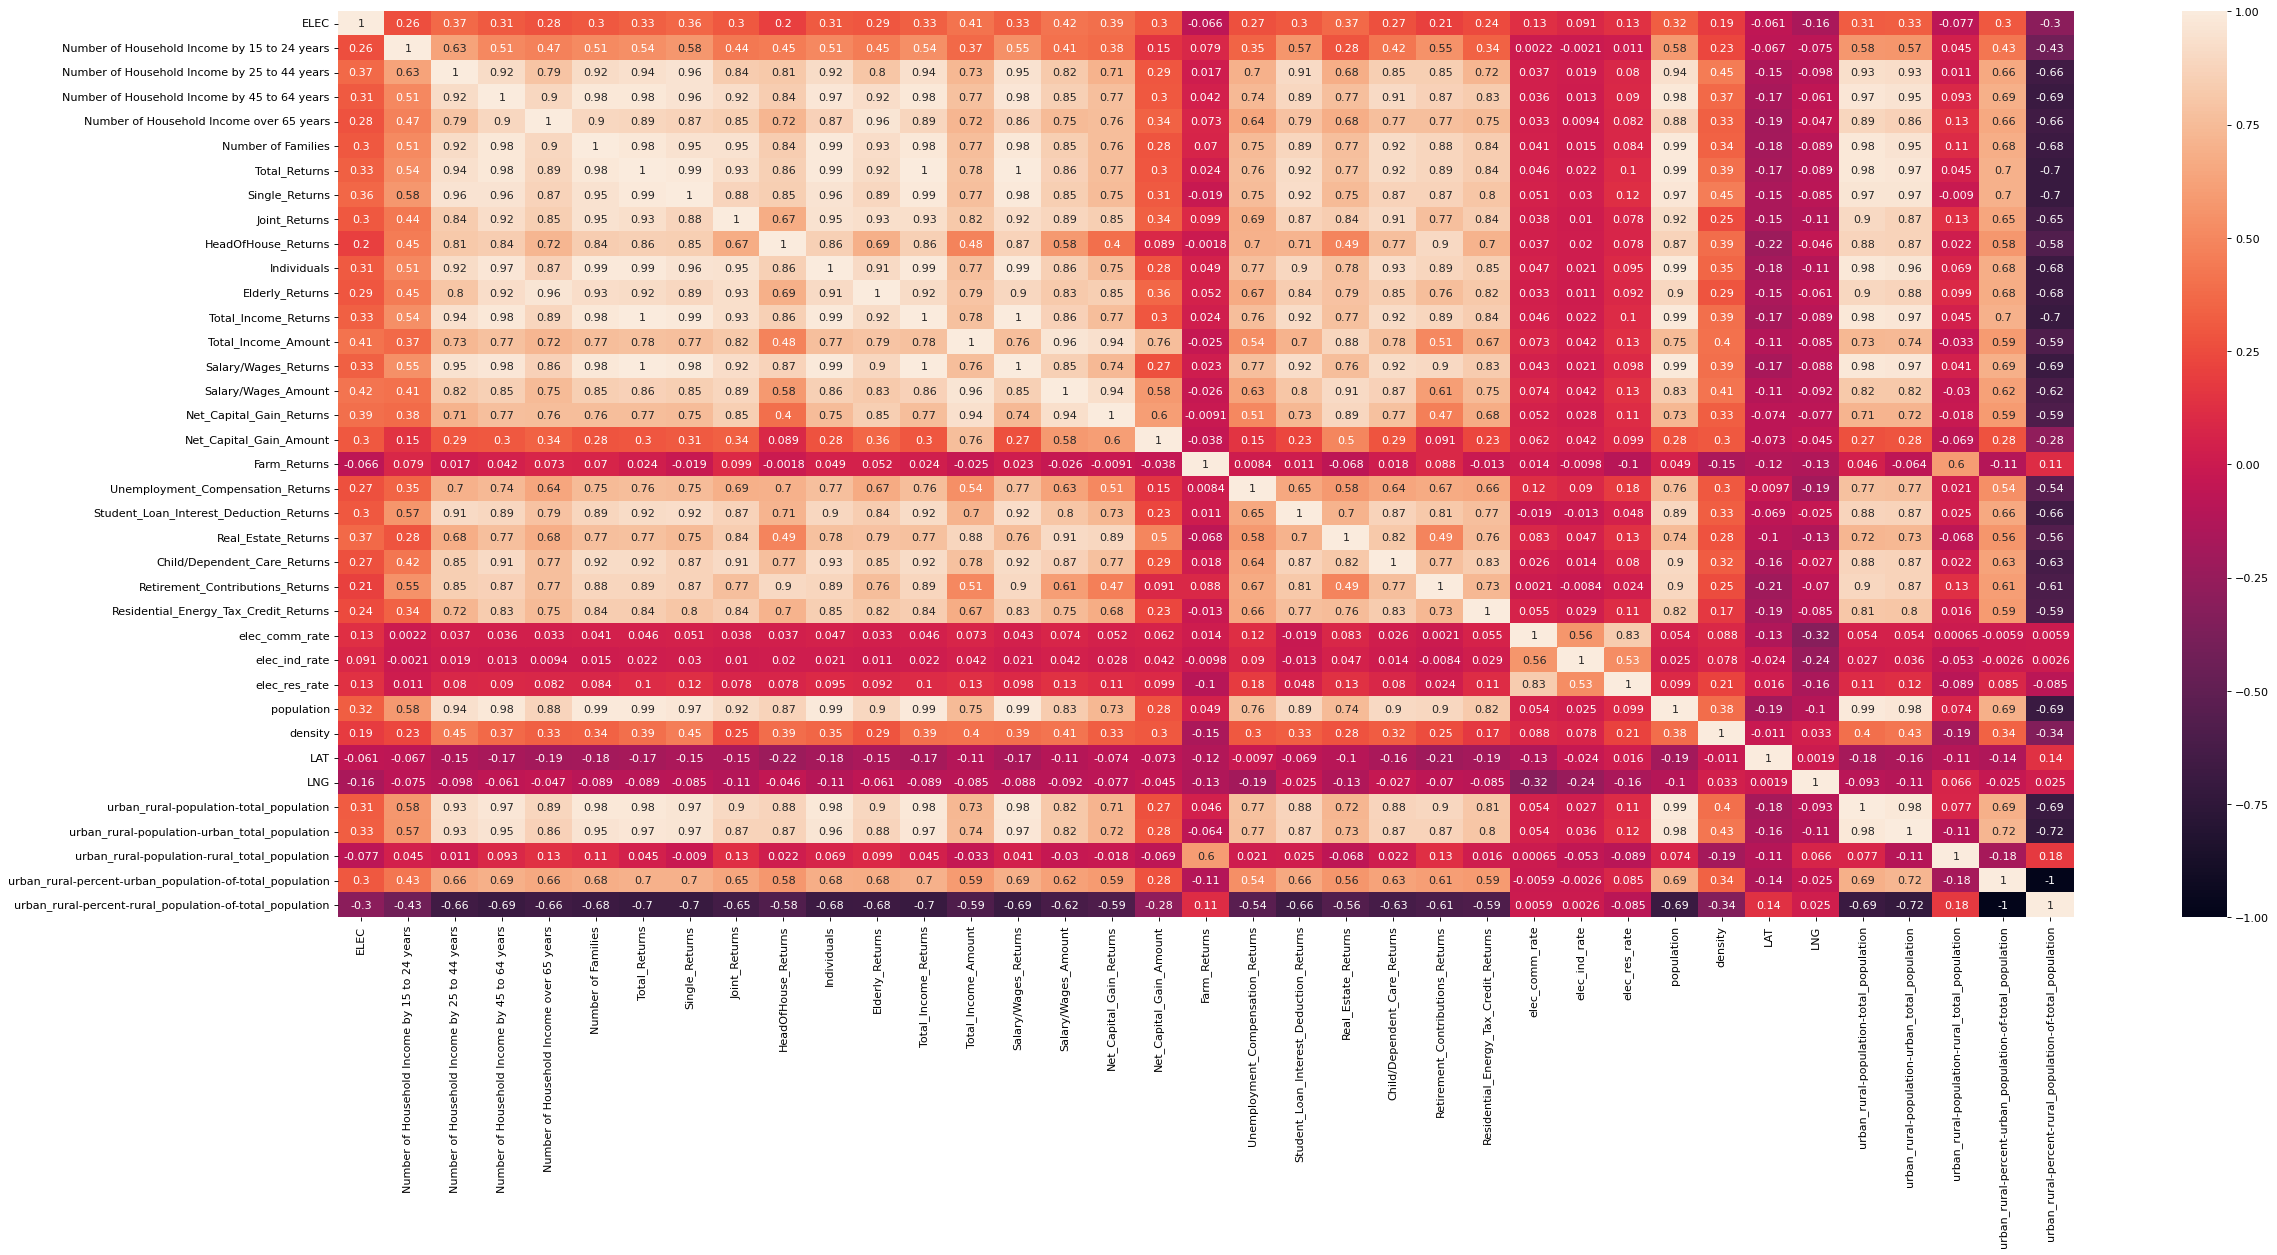

In [ ]:
# correnations
p1 = df_final
plt.figure(figsize=(35,15), dpi= 80)
p1 = p1.corr()
p1 = sns.heatmap(p1,                         
            xticklabels=p1.columns.values,
            yticklabels=p1.columns.values, annot = True)

### 2nd Plot

*   From the 1st plot, it can be found that 'Salary/Wages_Amount' and 'ELEC' have the highest positive correlation coefficient. The positive relationship between Salary/Wages_Amount and ELEC is shown in the scatter plot in the figure below.



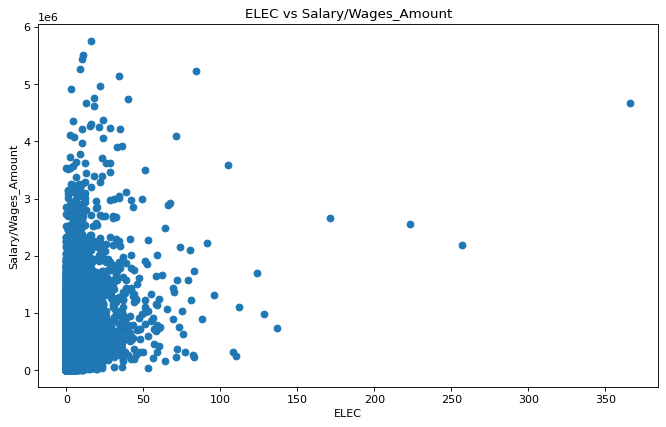

In [ ]:
# scatter plot for ELEC and Salary/Wages_Amount
p2 = df_final
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(x=p2['ELEC'], y=p2['Salary/Wages_Amount'])
plt.xlabel('ELEC')
plt.ylabel('Salary/Wages_Amount')
plt.title('ELEC vs Salary/Wages_Amount')
plt.show()

### 3rd Plot

*   From the 1st plot, it can be found that 'urban_rural-percent-rural_population-of-total_population' and 'ELEC' have the smallest negative correlation coefficient. The negative relationship between 'urban_rural-percent-rural_population-of-total_population' and 'ELEC' is shown in the scatter plot in the figure below.



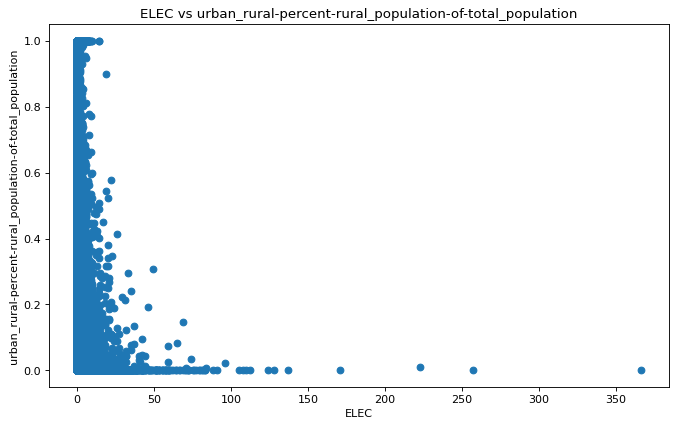

In [ ]:
# scatter plot for ELEC and urban_rural-percent-rural_population-of-total_population
p2 = df_final
plt.figure(figsize=(10,6), dpi= 80)
plt.scatter(x=p2['ELEC'], y=p2['urban_rural-percent-rural_population-of-total_population'])
plt.xlabel('ELEC')
plt.ylabel('urban_rural-percent-rural_population-of-total_population')
plt.title('ELEC vs urban_rural-percent-rural_population-of-total_population')
plt.show()

### 4th Plot

*   From this plot, we can see that public EV charging stations are all over the United States. Although relatively concentrated in the east and west, there are relatively few in the middle. But overall, it shouldn't be too difficult to find public EV charging stations in the US.

*   Also, as the article **[9]** mentions, the number of charging stations is very unevenly distributed across the country. California has nearly the same number as the 39 states, with the lowest number combined.

"Factbox: Five facts on the state of the U.S. electric vehicle charging network" (https://www.reuters.com/world/us/five-facts-state-us-electric-vehicle-charging-network-2021-09-01/)




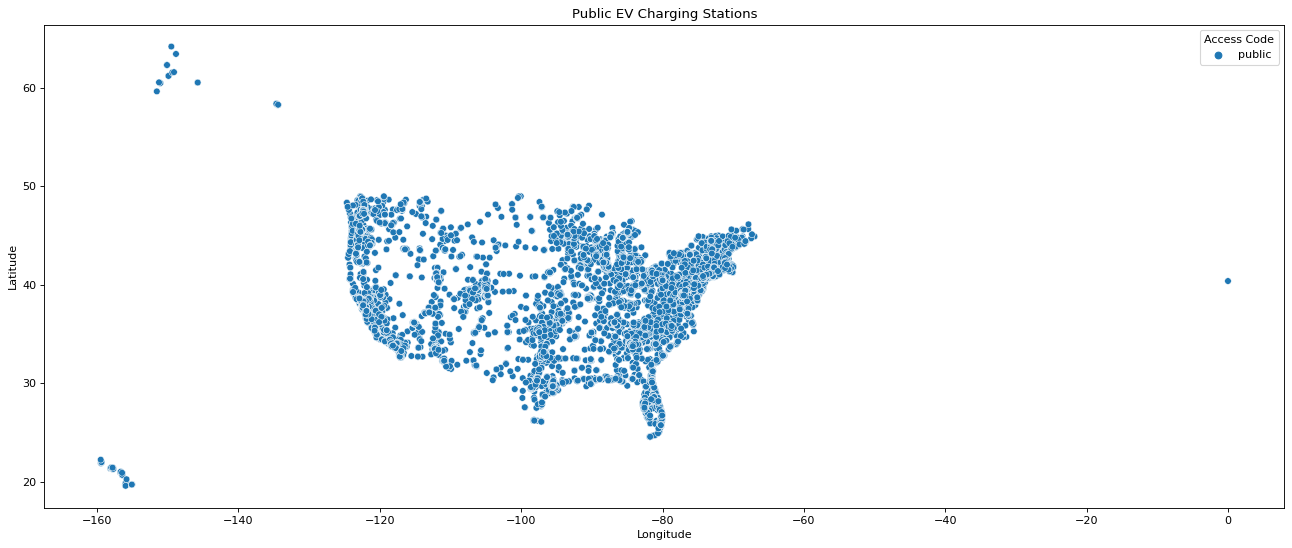

In [ ]:
# public EV charging stations
p4 = df_EV
p4 = p4[p4['Access Code'] == 'public']
plt.figure(figsize=(20,8), dpi= 80)
sns.scatterplot(x=p4['Longitude'], y=p4['Latitude'], hue = p4['Access Code'])
plt.title('Public EV Charging Stations')
plt.show() 

### 5th Plot

*   From this plot, it can be seen that private EV charging stations are not very common in the United States. And almost straight to the east, followed by the west. It's hard to find private EV charging stations in the central US. So there must be a strong reliance on public EV charging stations.



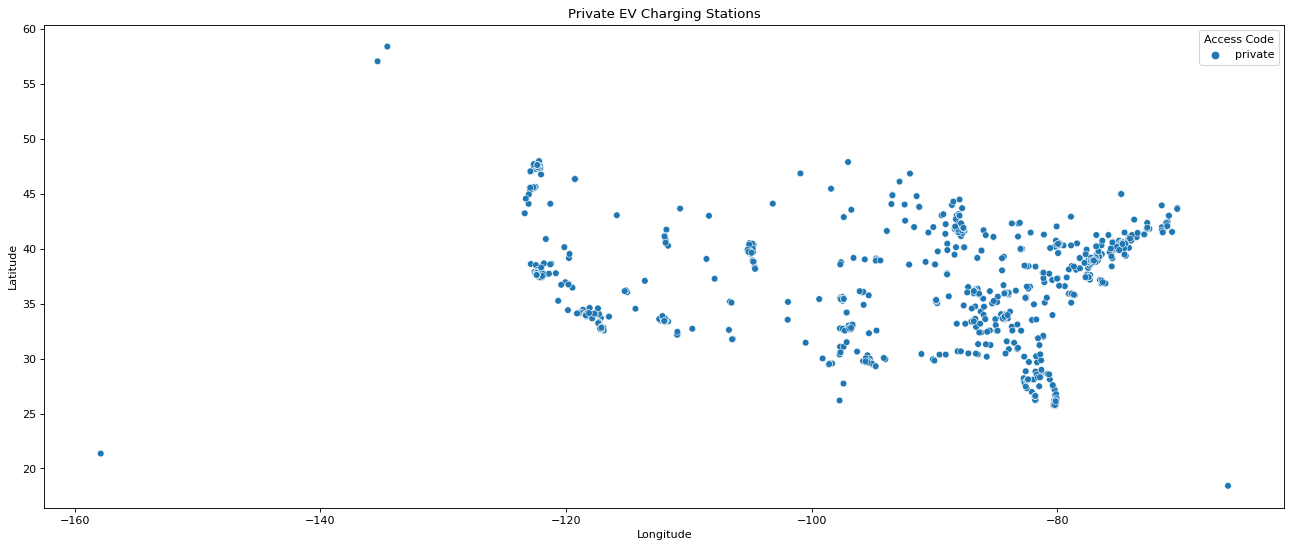

In [ ]:
# private EV charging stations
p5 = df_EV
p5 = p5[p5['Access Code'] == 'private']
plt.figure(figsize=(20,8), dpi= 80)
sns.scatterplot(x=p5['Longitude'], y=p5['Latitude'], hue = p5['Access Code'])
plt.title('Private EV Charging Stations')
plt.show() 

### 6th Plot

*   This plot shows the pricing of EV charging stations across the United States. It can be seen from this map that charging stations on the east, and west coasts are almost free or at lower prices. The higher-priced charging stations are almost all concentrated in the central United States.


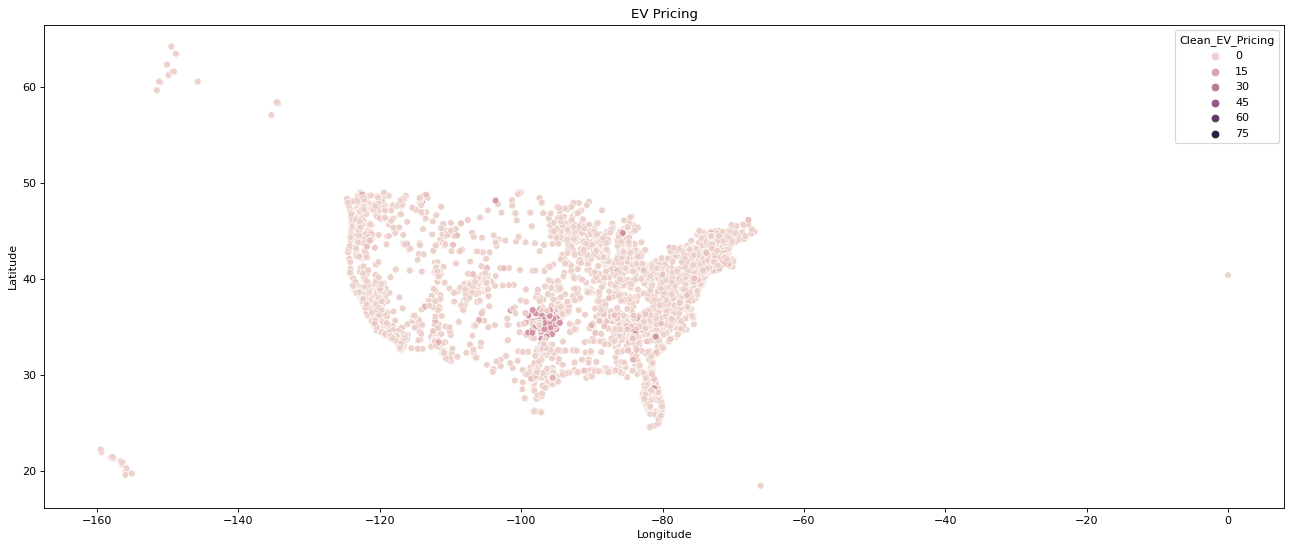

In [ ]:
# scatter plot for EV_Pricing
p6 = df_EV
plt.figure(figsize=(20,8), dpi= 80)
sns.scatterplot(x=p6['Longitude'], y=p6['Latitude'], hue = p6['Clean_EV_Pricing'])
plt.title('EV Pricing')
plt.show() 

### 7th Plot

*   It can be seen from the first plot that ELEC and population are somewhat positively correlated. And this plot also presents their relative trends in the top five states with the most EV charging stations.



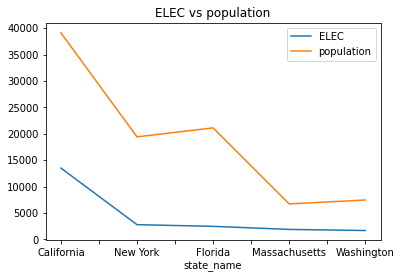

In [ ]:
# compare ELEC and population
p7 = df_final
p7 = p7.groupby(['state_name'])[['ELEC', 'population']].sum()
p7 = p7.sort_values('ELEC', ascending=False) # sort
p7 = p7.head()
p7['population'] = p7['population']/1000 # change to the thousands unit
p7[['ELEC', 'population']].plot()
plt.title('ELEC vs population')
plt.show()

### 8th Plot

In below pie chart on Number of Household incomes by Age group we can observe that age group of 45-64 has maximum household income

In [ ]:
# subsetting the dataframe for Number of Household income
df_subset = df_final.iloc[:,[3,4,5,6]]
df_subset.head()

,Number of Household Income by 15 to 24 years,Number of Household Income by 25 to 44 years,Number of Household Income by 45 to 64 years,Number of Household Income over 65 years
0,2539.0,2509.0,2852.0,2282.0
1,21.0,441.0,876.0,545.0
2,260.0,3223.0,3382.0,2381.0
3,70.0,3405.0,5332.0,4302.0
4,269.0,2153.0,3131.0,2627.0


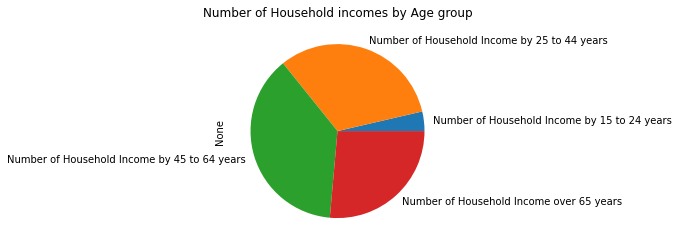

In [ ]:
df_subset[df_subset.columns[:]].sum().plot.pie(rot=0)

# making the plot
plt.title("Number of Household incomes by Age group")
plt.show()

### 9th Plot

* The below plot shows the heat map of number of charging stations by state

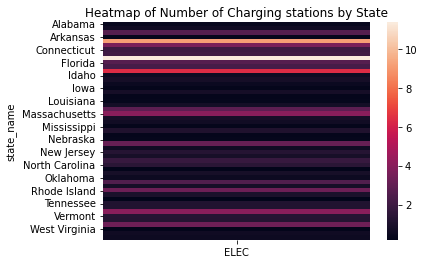

In [ ]:
import seaborn as sns
import pandas as pd
import numpy as np

p9 = df_final[['state_name', 'ELEC']]
p9 = p9.groupby(['state_name']).mean()
# Default heatmap
sns.heatmap(p9)
plt.title('Heatmap of Number of Charging stations by State')
plt.show()

### 10th Plot

*   The first plot shows a strong relationship between household income and the number of EV charging stations. As a result, this plot depicts Household Income for various age groups. The plot also shows that the Number of Household Income between the ages of 45 and 64 has the highest average, followed by the Number of Household Income between the ages of 25 and 44.

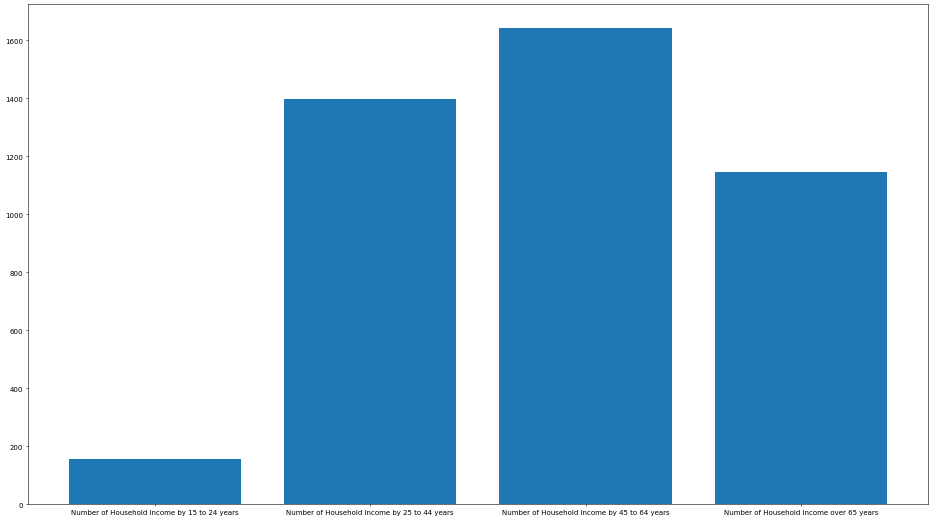

In [ ]:
# boxplots
p8 = df_final
p8 = p8[['Number of Household Income by 15 to 24 years', 'Number of Household Income by 25 to 44 years', 'Number of Household Income by 45 to 64 years', 'Number of Household Income over 65 years']]
p8 = p8.mean()
fig = plt.figure(figsize=(18,10), dpi= 50)
ax = fig.add_axes([0,0,1,1])
langs = ['Number of Household Income by 15 to 24 years', 'Number of Household Income by 25 to 44 years', 'Number of Household Income by 45 to 64 years', 'Number of Household Income over 65 years']
ax.bar(langs,p8)
plt.show()

# Modeling (25 pts)

You are fitting two different models. 

Your target variables will be:

*   a binary indicator for at least one ‘ELEC’ charging station per zip code (classification)
*  count of ‘ELEC’ charging stations per zip code (regression) 

Do not use either or these target variables as features in your models… it is cheating!

You can call your models Model1R for Model 1 regression, and Model1C for Model 1 classification etc.

## Data Splitting

Data splitting will be a simple 80/20 holdout sample with your group number as the random_state (random seed). USE THE SAME 80/20 SPLIT FOR BOTH MODELS. Please use whatever preprocessing you think is appropriate for Model 1 and 2 (i.e. sampling/imbalanced data, feature scaling and feature engineering are good options). 

### Data Splitting for Classification Models

In [ ]:
from imblearn.over_sampling import RandomOverSampler
from collections import Counter

In [ ]:
# setting up the split
X_C = df_final_model.drop('ELEC', axis=1) # dropping the target variable
y_C = np.where((df_final_model['ELEC'] >= 1), 1, 0) # target variable
validation_size = 0.2 # creating the validation variable
seed = 12 # creating seed
print(Counter(y_C))

Counter({0: 18640, 1: 8421})


In [ ]:
# define oversampling strategy
oversample = RandomOverSampler(sampling_strategy='minority')
# fit and apply the transform
X_C, y_C = oversample.fit_resample(X_C, y_C)
# summarize class distribution
print(Counter(y_C))

Counter({1: 18640, 0: 18640})


In [ ]:
# splitting
X_train_C, X_test_C, y_train_C, y_test_C = train_test_split(X_C, y_C, 
                                                    test_size = validation_size, # setting the test size to 0.2 with the validation_size variable
                                                    random_state = seed) # using group number for the seed

### Data Splitting for Regression Models

In [ ]:
# setting up the split
X_R = df_final_model.drop('ELEC', axis=1) # dropping the target variable
y_R = df_final_model['ELEC'] # target variable
validation_size = 0.2 # creating the validation variable
seed = 12 # creating seed

In [ ]:
# splitting
X_train_R, X_test_R, y_train_R, y_test_R = train_test_split(X_R, y_R, 
                                                    test_size = validation_size, # setting the test size to 0.2 with the validation_size variable
                                                    random_state = seed) # using group number for the seed

## Model 1 (8 pts)

a baseline linear regression with all variables (the kitchen sink model.)

### Model 1 Classification

In [ ]:
from sklearn.linear_model import LogisticRegression
# make a variable to store the general model
Model1C = LogisticRegression() #Logistic Regression
# fit the model
Model1C = Model1C.fit(X_train_C, y_train_C)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


In [ ]:
# store the predictions
train_preds_Model1C = Model1C.predict(X_train_C)
test_preds_Model1C = Model1C.predict(X_test_C)

### Model 1 Regression

In [ ]:
from sklearn.linear_model import LinearRegression
# make a variable to store the general model
Model1R = LinearRegression() # Linear Regression
# fit the model
Model1R = Model1R.fit(X_train_R, y_train_R)

In [ ]:
# store the predictions
train_preds_Model1R = Model1R.predict(X_train_R) #Train predictions
test_preds_Model1R = Model1R.predict(X_test_R) #Test predictions

## Model 2 (8 pts)
a ML model with hyperparameter tuning and variable selection.



*   Use spot-checking models then choose the best one to tune. Choose gradient boosting or random forest and do a reasonable grid search over all relevant parameters. 

### Model 2 Classification

In [ ]:
# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# more advanced ensemble models
from sklearn.naive_bayes import GaussianNB #Changes done
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier

from sklearn.decomposition import PCA
# error metrics
from sklearn.metrics import mean_squared_error

In [ ]:
# Spot check models for Gradient boosting / Random Forest / GaussianNB / KNeighborsClassifier
models = []
models.append(('GBC', GradientBoostingClassifier(random_state=seed))) # sometimes, for spot checking, you need to up the iterations!

models.append(('RFC',RandomForestClassifier(random_state=seed)))
models.append(('NB', GaussianNB()))
models.append(('KNN', KNeighborsClassifier()))


In [ ]:
# evaluate each model in turn
results = []
names = []

for name, model in models:
	kfold = KFold(n_splits=10, random_state=seed, shuffle=True)
	cv_results = cross_val_score(model, X_train_C, y_train_C, cv=kfold, scoring='accuracy')
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

GBC: 0.824805 (0.008379)
RFC: 0.901723 (0.006599)
NB: 0.759723 (0.006171)
KNN: 0.808811 (0.007658)


In [ ]:
# Tune scaled AdaBoost
param_grid = [{'max_leaf_nodes': [10,20,30],
                    'max_depth': [25,50,100], 
                    'criterion':['gini','entropy']}] # For RFC

model = RandomForestClassifier(random_state=seed)
kfold = KFold(n_splits=10, random_state= seed, shuffle=True)
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring='accuracy', cv=kfold)
grid_result = grid.fit(X_train_C, y_train_C)

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))

Best: 0.815517 using {'criterion': 'gini', 'max_depth': 25, 'max_leaf_nodes': 30}
0.803815 (0.009476) with: {'criterion': 'gini', 'max_depth': 25, 'max_leaf_nodes': 10}
0.810622 (0.009393) with: {'criterion': 'gini', 'max_depth': 25, 'max_leaf_nodes': 20}
0.815517 (0.009690) with: {'criterion': 'gini', 'max_depth': 25, 'max_leaf_nodes': 30}
0.803815 (0.009476) with: {'criterion': 'gini', 'max_depth': 50, 'max_leaf_nodes': 10}
0.810622 (0.009393) with: {'criterion': 'gini', 'max_depth': 50, 'max_leaf_nodes': 20}
0.815517 (0.009690) with: {'criterion': 'gini', 'max_depth': 50, 'max_leaf_nodes': 30}
0.803815 (0.009476) with: {'criterion': 'gini', 'max_depth': 100, 'max_leaf_nodes': 10}
0.810622 (0.009393) with: {'criterion': 'gini', 'max_depth': 100, 'max_leaf_nodes': 20}
0.815517 (0.009690) with: {'criterion': 'gini', 'max_depth': 100, 'max_leaf_nodes': 30}
0.802239 (0.009375) with: {'criterion': 'entropy', 'max_depth': 25, 'max_leaf_nodes': 10}
0.808073 (0.009349) with: {'criterion': 'e

In [ ]:
Model2C = RandomForestClassifier( max_leaf_nodes=30, criterion ='gini', max_depth= 25) #Building the model on best parameters from the grid search
Model2C = Model2C.fit(X_train_C, y_train_C) #Fit the model
train_preds_Model2C = Model2C.predict(X_train_C) #Train Predictions
test_preds_Model2C = Model2C.predict(X_test_C) #Test Predictions

### Model 2 Regression

In [ ]:
# pre-processing
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline

# more advanced ensemble models
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.ensemble import AdaBoostRegressor

from sklearn.decomposition import PCA
# error metrics
from sklearn.metrics import mean_squared_error

In [ ]:
# Spot Check Algorithms
models = []
models.append(('GBR', GradientBoostingRegressor())) #GBR
models.append(('RFR', RandomForestRegressor())) #RFR

In [ ]:
# Test options and evaluation metric
num_folds = 10 # for 10-fold CV # for reproducibility
scoring = 'neg_mean_squared_error'

# evaluate each model in turn
results = []
names = []
for name, model in models:
  # this makes an INDEX (between 1 and 10)
	kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True) #KFold
  
  # save the val results from X train 
	cv_results = cross_val_score(model, X_train_R, y_train_R, cv=kfold, scoring=scoring) 
	results.append(cv_results) #appending results
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg) #output

GBR: -33.392770 (22.898361)
RFR: -30.701379 (21.798851)


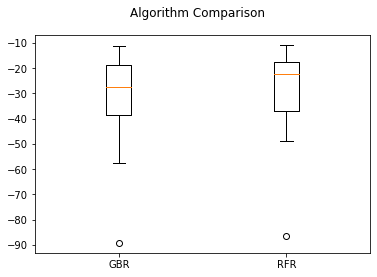

In [ ]:
# Compare Algorithms
fig = plt.figure()
fig.suptitle('Algorithm Comparison') #Setting the Title
ax = fig.add_subplot(111) #Subplots
plt.boxplot(results) #Results
ax.set_xticklabels(names) #Setting the Xlabels
plt.show() #Printing the output

In [ ]:
param_grid = {'n_estimators':[50,80],'max_depth': [5,10], #Parameters for hyper parameter tuning
              'min_samples_leaf':[5,10]} 

model = RandomForestRegressor(random_state=seed) #Building model
kfold = KFold(n_splits=num_folds, random_state=seed, shuffle=True) #Kfold
grid = GridSearchCV(estimator=model, param_grid=param_grid, scoring=scoring, cv=kfold) #Gridsearch for parameters
grid_result = grid.fit(X_train_R, y_train_R) #Fitting

print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_)) #Printing the accuracy with best parameters
means = grid_result.cv_results_['mean_test_score'] # mean test score
stds = grid_result.cv_results_['std_test_score'] # Std test score
params = grid_result.cv_results_['params'] #parameters
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param)) #print

Best: -28.923481 using {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 80}
-30.718202 (22.922751) with: {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 50}
-30.733533 (22.946648) with: {'max_depth': 5, 'min_samples_leaf': 5, 'n_estimators': 80}
-30.717010 (23.064492) with: {'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 50}
-30.630973 (23.127199) with: {'max_depth': 5, 'min_samples_leaf': 10, 'n_estimators': 80}
-29.109170 (21.744964) with: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 50}
-28.923481 (21.679708) with: {'max_depth': 10, 'min_samples_leaf': 5, 'n_estimators': 80}
-29.277393 (22.345815) with: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 50}
-29.141612 (22.325631) with: {'max_depth': 10, 'min_samples_leaf': 10, 'n_estimators': 80}


In [ ]:
Model2R = RandomForestRegressor(max_depth=10, min_samples_leaf =5, n_estimators = 80) #Building the model on best parameter
Model2R= Model2R.fit(X_train_R, y_train_R) #Fitting the model
train_preds_Model2R = Model2R.predict(X_train_R) #Predictions for X train
test_preds_Model2R = Model2R.predict(X_test_R) #Predictions for X test

## Model 3 (7 pts)
autoML with all variables! Let’s see if autoML is better at modeling than you. Copy and paste the best fitting pipeline into your script. You can play with the autoML/TPOT hyperparameters so that the model doesn’t run forever, but the defaults are pretty good.


### Model 3 Classification

In [ ]:
!pip install tpot

In [ ]:
from tpot import TPOTClassifier
import time

# Construct and fit TPOT classifier
start_time = time.time()
tpot = TPOTClassifier(generations=5, population_size=2, verbosity=2,random_state=seed)
tpot.fit(X_train_C, y_train_C)
end_time = time.time()

# Results
print('TPOT classifier finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test accuracy: %.3f' % tpot.score(X_test_C, y_test_C))

# Save best pipeline as Python script file
# make sure you update this path
tpot.export('tpot_EVClassifier_pipeline.py') # this will locally download on the left

Optimization Progress:   0%|          | 0/12 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: 0.8090462135765136

Generation 2 - Current best internal CV score: 0.8090462135765136

Generation 3 - Current best internal CV score: 0.8090462135765136

Generation 4 - Current best internal CV score: 0.8090462135765136

Generation 5 - Current best internal CV score: 0.8090462135765136

Best pipeline: DecisionTreeClassifier(RFE(DecisionTreeClassifier(input_matrix, criterion=gini, max_depth=6, min_samples_leaf=7, min_samples_split=3), criterion=entropy, max_features=0.9000000000000001, n_estimators=100, step=0.15000000000000002), criterion=entropy, max_depth=4, min_samples_leaf=13, min_samples_split=18)
TPOT classifier finished in 2329.9496886730194 seconds
Best pipeline test accuracy: 0.813


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


In [ ]:
# go look at the resulting pipeline, on the left...
# copy and paste it in
# update paths, evaluate it!
from sklearn.metrics import accuracy_score

In [ ]:
import numpy as np
import pandas as pd
from sklearn.ensemble import ExtraTreesClassifier
from sklearn.feature_selection import RFE
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline, make_union
from sklearn.tree import DecisionTreeClassifier
from tpot.builtins import StackingEstimator
from tpot.export_utils import set_param_recursive

# Average CV score on the training set was: 0.8093480300635891
Model3C = make_pipeline(
    StackingEstimator(estimator=DecisionTreeClassifier(criterion="gini", max_depth=6, min_samples_leaf=7, min_samples_split=3)),
    DecisionTreeClassifier(criterion="entropy", max_depth=4, min_samples_leaf=13, min_samples_split=18)
)

# Fix random state in exported estimator
if hasattr(Model3C, 'random_state'):
    setattr(Model3C, 'random_state', 12)
Model3C.fit(X_train_C, y_train_C)
train_preds_Model3C = Model3C.predict(X_train_C)
test_preds_Model3C = Model3C.predict(X_test_C)
print(accuracy_score(y_train_C,train_preds_Model3C))
print(accuracy_score(y_test_C,test_preds_Model3C))

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


0.8204130901287554
0.8127682403433476


/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"


### Model 3 Regression

In [ ]:
# let's use a regressor instead of a classifier
from tpot import TPOTRegressor

In [ ]:
# Construct and fit TPOT classifier
start_time = time.time()
tpot = TPOTRegressor(generations=5, population_size= 2, verbosity=2, scoring='neg_mean_absolute_error', random_state=seed)
tpot.fit(X_train_R, y_train_R)
end_time = time.time()

# Results
print('TPOT regressor finished in %s seconds' % (end_time - start_time)) 
print('Best pipeline test neg(MAE): %.3f' % tpot.score(X_test_R, y_test_R))

# Save best pipeline as Python script file
tpot.export('tpot_EVRegressor_pipeline.py') # look left!

Optimization Progress:   0%|          | 0/12 [00:00<?, ?pipeline/s]


Generation 1 - Current best internal CV score: -1.5733438290968298

Generation 2 - Current best internal CV score: -1.5134482796493807

Generation 3 - Current best internal CV score: -1.5110297935583958

Generation 4 - Current best internal CV score: -1.5110297935583958

Generation 5 - Current best internal CV score: -1.5106903226304123

Best pipeline: RandomForestRegressor(input_matrix, bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=17, min_samples_split=7, n_estimators=100)
TPOT regressor finished in 1512.2343418598175 seconds
Best pipeline test neg(MAE): -1.441


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import train_test_split

# Average CV score on the training set was: -1.5106903226304123
Model3R = RandomForestRegressor(bootstrap=True, max_features=0.6500000000000001, min_samples_leaf=17, min_samples_split=7, n_estimators=100)
# Fix random state in exported estimator
if hasattr(Model3R, 'random_state'):
    setattr(Model3R, 'random_state', 12)

Model3R.fit(X_train_R, y_train_R)
results = Model3R.predict(X_test_R)
train_preds_Model3R = Model3R.predict(X_train_R)
test_preds_Model3R = Model3R.predict(X_test_R)

# Error Metrics (5 pts)

## Error Metrics for Classification

confusion matrix and classification report (you are welcome to explore thresholds other than 0.5 to improve the results)

### Function for Confusion and Classification matrix

In [ ]:
## Printing confusion Matrix and Evaluation report 
def evaluation_metric_gen(test_gen, model):

  ''''
  
  This function will calculate the Confusion matrix as well as other fit statistic

  Again, we will leverage seaborn for this.

  '''
  # Predict our classes using our model

  # Get true labels from test data
  # true_classes = test_gen.classes
  # class_labels = list(test_gen.class_indices.keys()) 


# from sklearn.metrics import confusion_matrix
# preds = np.round(model.predict(x_val),0) #-> round to a whole number (0 or 1)
# matrix = confusion_matrix(y_val, preds)
# print(classification_report(y_val, preds))

  # Make confusion matrix
  cf_matrix = confusion_matrix(test_gen, model)

  # Names for prediction classes
  group_names = ['True Neg','False Pos','False Neg','True Pos']

  # get count in each class
  group_counts = ["{0:0.0f}".format(value) for value in
                  cf_matrix.flatten()]

  # get percentage of each class
  group_percentages = ["{0:.2%}".format(value) for value in
                      cf_matrix.flatten()/np.sum(cf_matrix)]

  # merge class,count and percentage
  labels = [f"{v1}\n{v2}\n{v3}" for v1, v2, v3 in
            zip(group_names,group_counts,group_percentages)]

  labels = np.asarray(labels).reshape(2,2)

  # Plot Confusion matrix as a heatmat
  ax = sns.heatmap(cf_matrix, annot=labels, fmt='', cmap='Blues')

  ax.set_title('Confusion Matrix\n');
  ax.set_xlabel('\nPredicted Values')
  ax.set_ylabel('Actual Values ');

  ## Ticket labels - List must be in alphabetical order
  ax.xaxis.set_ticklabels(['EV','No EV'])
  ax.yaxis.set_ticklabels(['EV','No EV'])

  ## Display the visualization of the Confusion Matrix.
  plt.show()

  # Print evaluation Report
  report = classification_report(test_gen, model)
  print('\n',report)    


 

In [ ]:
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix

### Model 1

#### Train Data

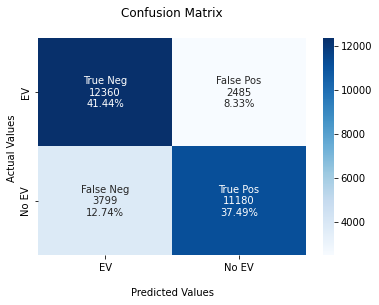


               precision    recall  f1-score   support

           0       0.76      0.83      0.80     14845
           1       0.82      0.75      0.78     14979

    accuracy                           0.79     29824
   macro avg       0.79      0.79      0.79     29824
weighted avg       0.79      0.79      0.79     29824



In [ ]:
evaluation_metric_gen(y_train_C, train_preds_Model1C) #Train

#### Test Data

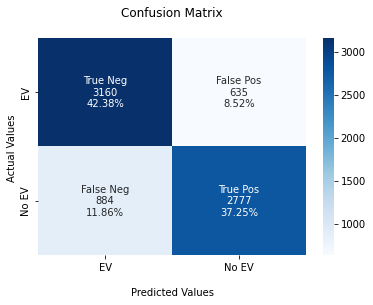


               precision    recall  f1-score   support

           0       0.78      0.83      0.81      3795
           1       0.81      0.76      0.79      3661

    accuracy                           0.80      7456
   macro avg       0.80      0.80      0.80      7456
weighted avg       0.80      0.80      0.80      7456



In [ ]:
evaluation_metric_gen(y_test_C, test_preds_Model1C) #Test

### Model 2

####Train Data

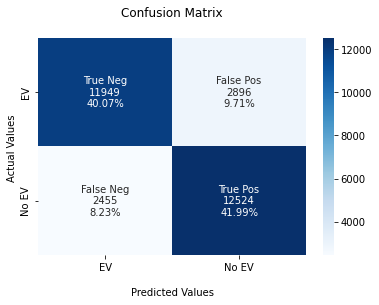


               precision    recall  f1-score   support

           0       0.83      0.80      0.82     14845
           1       0.81      0.84      0.82     14979

    accuracy                           0.82     29824
   macro avg       0.82      0.82      0.82     29824
weighted avg       0.82      0.82      0.82     29824



In [ ]:
evaluation_metric_gen(y_train_C, train_preds_Model2C) #Test

#### Test Data

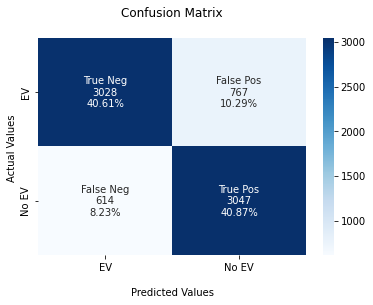


               precision    recall  f1-score   support

           0       0.83      0.80      0.81      3795
           1       0.80      0.83      0.82      3661

    accuracy                           0.81      7456
   macro avg       0.82      0.82      0.81      7456
weighted avg       0.82      0.81      0.81      7456



In [ ]:
evaluation_metric_gen(y_test_C, test_preds_Model2C) #Test

### Model 3

#### Train Data

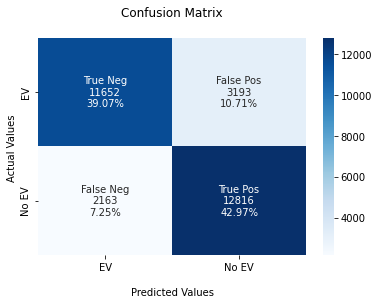


               precision    recall  f1-score   support

           0       0.84      0.78      0.81     14845
           1       0.80      0.86      0.83     14979

    accuracy                           0.82     29824
   macro avg       0.82      0.82      0.82     29824
weighted avg       0.82      0.82      0.82     29824



In [ ]:
evaluation_metric_gen(y_train_C, train_preds_Model3C)

#### Test Data

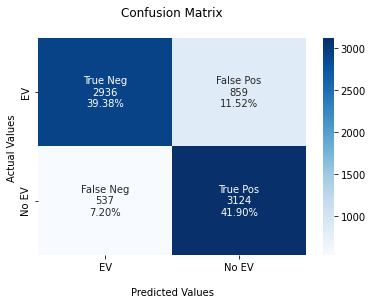


               precision    recall  f1-score   support

           0       0.85      0.77      0.81      3795
           1       0.78      0.85      0.82      3661

    accuracy                           0.81      7456
   macro avg       0.81      0.81      0.81      7456
weighted avg       0.82      0.81      0.81      7456



In [ ]:
evaluation_metric_gen(y_test_C, test_preds_Model3C)

## Error Metrics for Regression


In [ ]:
def scatter_plots(train_data, train_predictions, test_data, test_predictions):
  # specify the dimensions 
  fig, axes = plt.subplots(1,2) # 1 row, 3 columns

  # fig limits
  #fig.tight_layout()
  # add a main title across top
  fig.suptitle("Linear Regression Results", fontsize=20)

  # this makes the individual subplots
  axes[0].scatter(x= train_data, y= train_predictions) #first row, first entry (left top)
  axes[0].set_xlabel("Actual", fontsize=10)
  axes[0].set_ylabel("Predicted (TRAIN)",  fontsize=10)
  # set plot limits
  axes[0].set_xlim(0,150)
  axes[0].set_ylim(0,50)
  # add 45 degree line to left panel
  x = np.linspace(*axes[0].get_xlim())
  axes[0].plot(x, x, color='red')


  axes[1].scatter(x= test_data, y= test_predictions) # first row, second entry (right top)
  axes[1].set_xlabel("Actual", fontsize=10)
  axes[1].set_ylabel("Predicted (TEST)",  fontsize=10)
  # set plot limits
  axes[1].set_xlim(0,100)
  axes[1].set_ylim(0,20)
  # add 45 degree line to right panel
  x = np.linspace(*axes[1].get_xlim())
  axes[1].plot(x, x, color='red')

In [ ]:
def error_metrics(y_train_data,train_predictions,y_test_data,test_predictions ):

  # Calculate MAE, MSE, and R2 for train and test results.
  Train_MAE = mean_absolute_error(y_train_data, train_predictions) #train
  Test_MAE = mean_absolute_error(y_test_data,test_predictions) # test
  #Val_MAE = mean_absolute_error(y1_val,Val_preds) # val
  #MSE
  Train_MSE = mean_squared_error(y_train_data, train_predictions) #train
  Test_MSE = mean_squared_error(y_test_data, test_predictions) #test
  #Val_MSE = mean_squared_error(y1_val, Val_preds) #val

  # Creating a dataframe
  data = { 'Train data' : [r2_score(y_train_data,train_predictions),Train_MAE,Train_MSE],
            'Test data' : [r2_score(y_test_data, test_predictions),Test_MAE,Test_MSE]
          }
  df_table = pd.DataFrame(data, index= ['R2','MAE','MSE'])
  return df_table

In [ ]:
from sklearn.metrics import mean_absolute_error
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

#### Model 1 

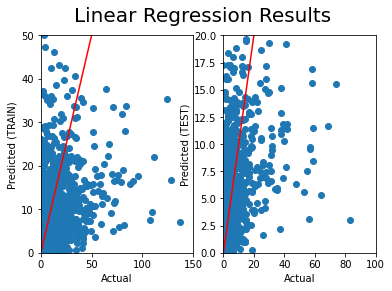

In [ ]:
scatter_plots(y_train_R, train_preds_Model1R, y_test_R, test_preds_Model1R)

In [ ]:
error_metrics(y_train_R,train_preds_Model1R,y_test_R,test_preds_Model1R)

,Train data,Test data
R2,0.277229,0.325037
MAE,1.754140,1.748930
MSE,30.471713,19.815865


### Model 2 

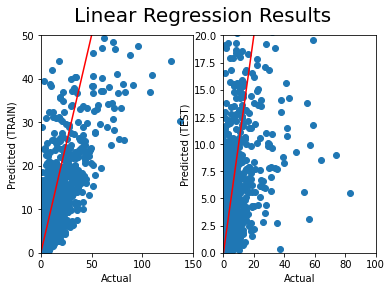

In [ ]:
scatter_plots(y_train_R, train_preds_Model2R, y_test_R, test_preds_Model2R)

In [ ]:
error_metrics(y_train_R,train_preds_Model2R,y_test_R,test_preds_Model2R)

,Train data,Test data
R2,0.578388,0.412962
MAE,1.224844,1.446948
MSE,17.774992,17.234511


### Model 3

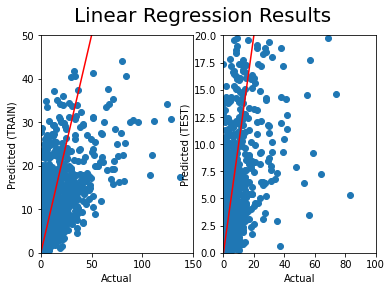

In [ ]:
scatter_plots(y_train_R, train_preds_Model3R, y_test_R, test_preds_Model3R)

In [ ]:
error_metrics(y_train_R, train_preds_Model3R, y_test_R, test_preds_Model3R)

,Train data,Test data
R2,0.440205,0.427415
MAE,1.294372,1.440692
MSE,23.600728,16.810202


## Summary


*   For the regression models, the Auto ML produced the Random Forest Regressor to be the best performing model among all the models.


*   Based on the scatter plots, there was a better fitting on test data for the Random Forest Regressor which is the best spot checking model to tune.  

*   The model 2 and model 3 produced similar error metric values which are R2, MSE and MAE. The results are comparable as the model show almost the same performance.


*   All the classification models performed similarly with an accuracy of 80% for the logistic regression and the random forest classifier.

*   The use of Auto ML benefitted the modelling part where an accuracy of 89% is attained. The Auto ML optimized the hyper parameters to give us the best model results which is Decision Tree Classifier.







# Interpretability (30 pts)
Something I am particularly interested in assessing you on is model interpretability. You are welcome to interactively work with permutation importance and partial dependence plots to make your best fitting model (recommended.) Make sure your plots have nice titles and labeled axes.



## Permutation Feature Importance (10 pts)

(10 pts) Create permutation feature importance for each of the three models (show as a 3-panel plot like we do in class). Identify the top 10 important  variables in each model. What trends do you see among the different models?

## Regression

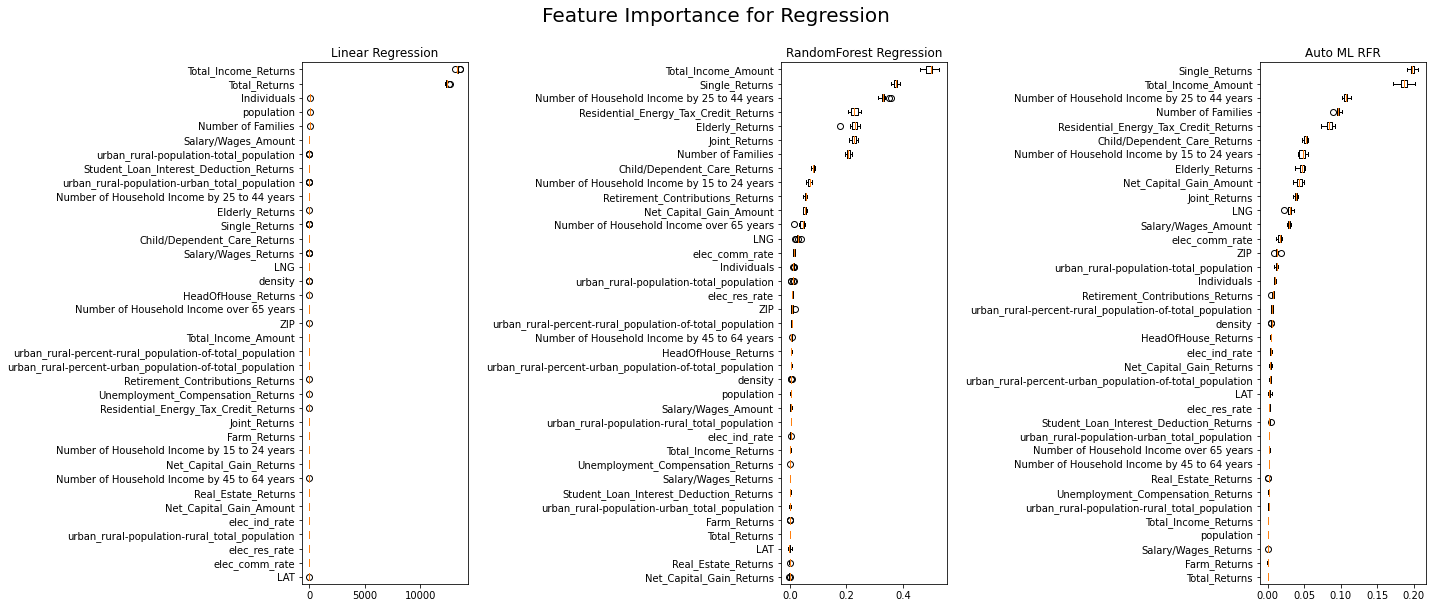

In [ ]:
# permutation testing
from sklearn.inspection import permutation_importance# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8)) # 1 row, 3 columns
fig.tight_layout()
plt.suptitle('Feature Importance for Regression', y= 1.05, size = 20)

# LR
clf = Model1R # don't forget to update title!
result = permutation_importance(clf, X_test_R, y_test_R, n_repeats=10, #Linear Regression
                                random_state= seed)
perm_sorted_idx = result.importances_mean.argsort() #Sort
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_R.columns[perm_sorted_idx]) #Boxplot for each variables in main plot
ax1.set_title('Linear Regression') #Linear Regression

# RFR
clf = Model2R # don't forget to update title!
result = permutation_importance(clf, X_test_R, y_test_R, n_repeats=10, #RFR
                                random_state= seed)
perm_sorted_idx = result.importances_mean.argsort() #Sort

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_R.columns[perm_sorted_idx]) #Boxplot for each variables in main plot
ax2.set_title('RandomForest Regression') #Title

# Auto ML
clf = Model3R # don't forget to update title!
result = permutation_importance(clf, X_test_R, y_test_R, n_repeats=10,
                                random_state=seed ) #Auto ML
perm_sorted_idx = result.importances_mean.argsort() #Sort

ax3.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_R.columns[perm_sorted_idx]) #Boxplot for each variables in main plot
ax3.set_title('Auto ML RFR') #Title

fig.tight_layout()
plt.show() #print

In [ ]:
!pip install eli5

#### Model 1

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(Model1R, random_state=seed).fit(X_test_R, y_test_R) #Fit on test 
eli5.show_weights(perm, feature_names = X_test_R.columns.tolist()) #table for features

Weight,Feature
13318.1115 ± 449.6550,Total_Income_Returns
12282.3730 ± 389.7397,Total_Returns
5.4693 ± 0.1732,Individuals
3.6567 ± 0.2066,population
2.1029 ± 0.0406,Number of Families
0.7626 ± 0.0320,Salary/Wages_Amount
0.3863 ± 0.0165,urban_rural-population-total_population
0.2857 ± 0.0253,Student_Loan_Interest_Deduction_Returns
0.2315 ± 0.0190,urban_rural-population-urban_total_population
0.2103 ± 0.0126,Number of Household Income by 25 to 44 years


From the Permutation Feature Important, we obtained the first 10 important features for linear regression as


1.   Total Income Returns
2.   Total_Returns

3.   Individuals

4.   population
5.   Number of Families

6.   Salary/Wages_Amount

7.   urban_rural-population-total_population
8.   Student_Loan_Interest_Deduction_Returns

9.  urban_rural-population-urban_total_population
 
10. Number of Household Income by 25 to 44 years



In [ ]:
 model1_X= ["Total_Income_Returns", #subsetting the first 10 important variables for PDP plots
	"Total_Returns",
	"Individuals",
	"population",
	"Number of Families",
	"Salary/Wages_Amount",
	"urban_rural-population-total_population",
	"Student_Loan_Interest_Deduction_Returns",
	"urban_rural-population-urban_total_population",
  "Number of Household Income by 25 to 44 years"]

##### pdp subset

In [ ]:
pdp_clean_m1R=X_train_R[["Total_Income_Returns",
  "Total_Returns",
  "Individuals",
  "population", 
  "Number of Families", 
  "Salary/Wages_Amount", 
  "urban_rural-population-total_population", 
  "Student_Loan_Interest_Deduction_Returns", 
  "urban_rural-population-urban_total_population", 
  "Number of Household Income by 25 to 44 years",  
  'ZIP',
 'Number of Household Income by 15 to 24 years',
 'Number of Household Income by 45 to 64 years',
 'Number of Household Income over 65 years',
 'Single_Returns',
 'Joint_Returns',
 'HeadOfHouse_Returns',
 'Elderly_Returns',
 'Total_Income_Amount',
 'Salary/Wages_Returns',
 'Net_Capital_Gain_Returns',
 'Net_Capital_Gain_Amount',
 'Farm_Returns',
 'Unemployment_Compensation_Returns',
 'Real_Estate_Returns',
 'Child/Dependent_Care_Returns',
 'Retirement_Contributions_Returns',
 'Residential_Energy_Tax_Credit_Returns',
 'elec_comm_rate',
 'elec_ind_rate',
 'elec_res_rate',
 'density',
 'LAT',
 'LNG',
 'urban_rural-population-rural_total_population',
 'urban_rural-percent-urban_population-of-total_population',
 'urban_rural-percent-rural_population-of-total_population']]

### Model 2

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(Model2R, random_state=seed).fit(X_test_R, y_test_R)
eli5.show_weights(perm, feature_names = X_test_R.columns.tolist())

Weight,Feature
0.4936 ± 0.0450,Total_Income_Amount
0.3781 ± 0.0230,Single_Returns
0.3423 ± 0.0076,Number of Household Income by 25 to 44 years
0.2427 ± 0.0211,Residential_Energy_Tax_Credit_Returns
0.2263 ± 0.0261,Elderly_Returns
0.2235 ± 0.0082,Joint_Returns
0.2148 ± 0.0116,Number of Families
0.0829 ± 0.0136,Child/Dependent_Care_Returns
0.0688 ± 0.0150,Number of Household Income by 15 to 24 years
0.0564 ± 0.0088,Retirement_Contributions_Returns


In [ ]:
model2_X = ["Total_Income_Amount", #subsetting the first 10 important variables for PDP plots
	"Number of Household Income by 25 to 44 years",
	"Single_Returns",
	"Number of Families",
	"Elderly_Returns",
	"Joint_Returns",
	"Residential_Energy_Tax_Credit_Returns",
	"Net_Capital_Gain_Amount",
	"Number of Household Income by 15 to 24 years",
	"Child/Dependent_Care_Returns"]

##### pdp subset

In [ ]:
pdp_clean_M2R = X_train_R[["Total_Income_Amount",
	"Single_Returns",
	"Residential_Energy_Tax_Credit_Returns",
	"Number of Household Income by 25 to 44 years",
	"Elderly_Returns",
	"Number of Families",
	"Joint_Returns",
	"Number of Household Income by 15 to 24 years",
	"Child/Dependent_Care_Returns",
	"Net_Capital_Gain_Amount",
'ZIP',
 'Number of Household Income by 45 to 64 years',
 'Number of Household Income over 65 years',
 'Total_Returns',
 'HeadOfHouse_Returns',
 'Individuals',
 'Total_Income_Returns',
 'Salary/Wages_Returns',
 'Salary/Wages_Amount',
 'Net_Capital_Gain_Returns',
 'Farm_Returns',
 'Unemployment_Compensation_Returns',
 'Student_Loan_Interest_Deduction_Returns',
 'Real_Estate_Returns',
 'Retirement_Contributions_Returns',
 'elec_comm_rate',
 'elec_ind_rate',
 'elec_res_rate',
 'population',
 'density',
 'LAT',
 'LNG',
 'urban_rural-population-total_population',
 'urban_rural-population-urban_total_population',
 'urban_rural-population-rural_total_population',
 'urban_rural-percent-urban_population-of-total_population',
 'urban_rural-percent-rural_population-of-total_population']]

From the Permutation Feature Important, we obtained the first 10 important features for RandomForest regression as


1.   Total_Income_Amount

2.   Number of Household Income by 25 to 44 years

3.   Single_Return

4.   Number of Families

5.   Elderly_Returns

6.   Joint_Returns
7.   Residential_Energy_Tax_Credit_Returns

8.  Net_Capital_Gain_Amount
 
9. Number of Household Income by 15 to 24 years
10. Child/Dependent_Care_Returns


### Model 3

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(Model3R, random_state=seed).fit(X_test_R, y_test_R)
eli5.show_weights(perm, feature_names = X_test_R.columns.tolist())

Weight,Feature
0.2010 ± 0.0128,Single_Returns
0.1785 ± 0.0271,Total_Income_Amount
0.1105 ± 0.0065,Number of Household Income by 25 to 44 years
0.0986 ± 0.0066,Number of Families
0.0919 ± 0.0060,Residential_Energy_Tax_Credit_Returns
0.0522 ± 0.0063,Child/Dependent_Care_Returns
0.0485 ± 0.0117,Number of Household Income by 15 to 24 years
0.0446 ± 0.0048,Elderly_Returns
0.0411 ± 0.0045,Net_Capital_Gain_Amount
0.0388 ± 0.0023,Joint_Returns


In [ ]:
model3_X = ["Single_Returns", #subsetting the first 10 important variables for PDP plots
	"Total_Income_Amount",
	"Number of Household Income by 25 to 44 years",
	"Number of Families",
	"Residential_Energy_Tax_Credit_Returns",
	"Child/Dependent_Care_Returns",
	"Number of Household Income by 15 to 24 years",
  "Elderly_Returns",
	"Net_Capital_Gain_Amount",
	"Joint_Returns"]

##### pdp subset

In [ ]:
pdp_clean_M3R = X_train_R[["Single_Returns",
	"Total_Income_Amount",
	"Number of Household Income by 25 to 44 years",
	"Number of Families",
	"Residential_Energy_Tax_Credit_Returns",
	"Child/Dependent_Care_Returns",
	"Number of Household Income by 15 to 24 years",
  "Elderly_Returns",
	"Net_Capital_Gain_Amount",
	"Joint_Returns",
	'ZIP',
 'Number of Household Income by 45 to 64 years',
 'Number of Household Income over 65 years',
 'Total_Returns',
 'HeadOfHouse_Returns',
 'Individuals',
 'Total_Income_Returns',
 'Salary/Wages_Returns',
 'Salary/Wages_Amount',
 'Net_Capital_Gain_Returns',
 'Farm_Returns',
 'Unemployment_Compensation_Returns',
 'Student_Loan_Interest_Deduction_Returns',
 'Real_Estate_Returns',
 'Retirement_Contributions_Returns',
 'elec_comm_rate',
 'elec_ind_rate',
 'elec_res_rate',
 'population',
 'density',
 'LAT',
 'LNG',
 'urban_rural-population-total_population',
 'urban_rural-population-urban_total_population',
 'urban_rural-population-rural_total_population',
 'urban_rural-percent-urban_population-of-total_population',
 'urban_rural-percent-rural_population-of-total_population']]

From the Permutation Feature Important, we obtained the first 10 important features for RandomForest regression as


1.   Single_Returns

2.   Total_Income_Amount
3.   Number of Household Income by 25 to 44 years

4.   Number of Families

5.   Residential_Energy_Tax_Credit_Returns

6.   Child/Dependent_Care_Returns
7.   Number of Household Income by 15 to 24 years

8.  Elderly_Returns
 
9.  Net_Capital_Gain_Amount
10. Joint_Returns







*   From the main dataset, there are certain variables which are the important features in all the three  regression models such as Total_Income_returns, Number of household income by 25 to 44 years, Number of families and few other variables.
*   From the aspect of permutation feature importance, we can certainly assume that the above factors like number of families and number of household income by 25 to 44 years will influence in the prediction of the number of charging EV stations in a locality/Zipcode. 



*   The Random Forest Regression and Auto ML models are taking most of the variables as important features when compared to model 1 Linear Regression





## Classification

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

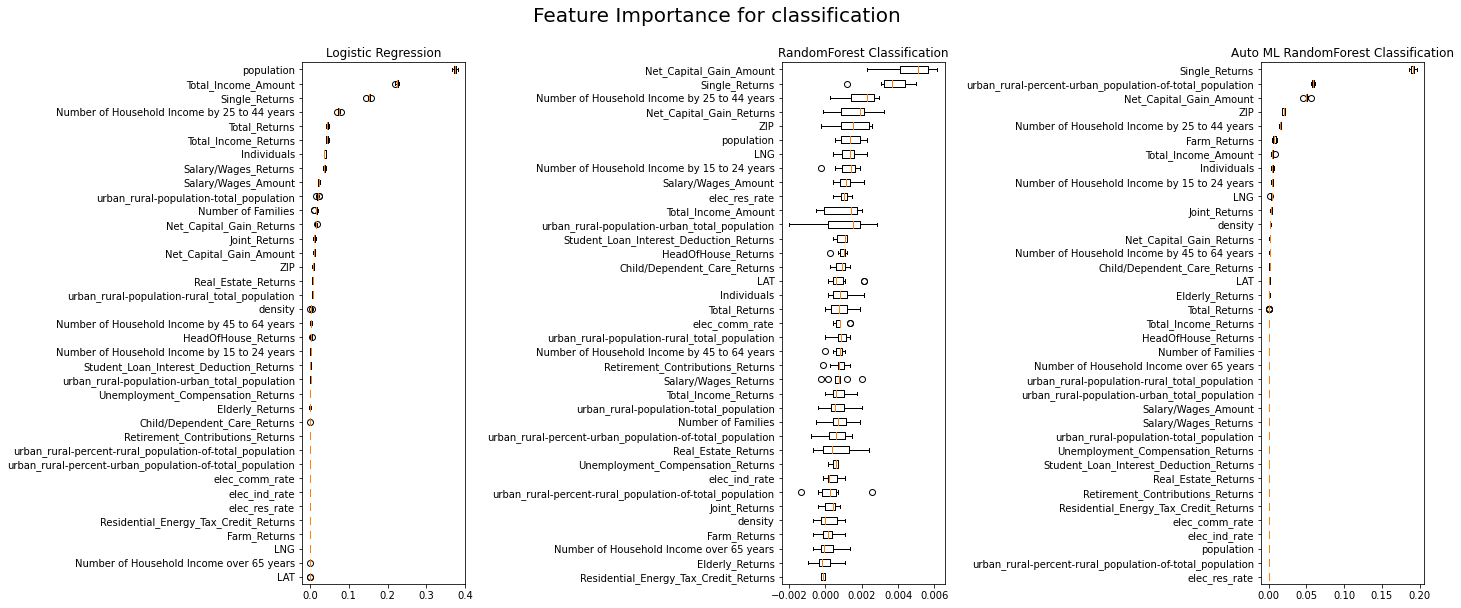

In [ ]:
from sklearn.inspection import permutation_importance# plot basics
fig, (ax1, ax2, ax3) = plt.subplots(1, 3, figsize=(20, 8)) # 1 row, 3 columns
fig.tight_layout()
plt.suptitle('Feature Importance for classification', y= 1.05, size = 20)

# LR
clf = Model1C # don't forget to update title!
result = permutation_importance(clf, X_test_C, y_test_C, n_repeats=10,
          random_state= seed)
perm_sorted_idx = result.importances_mean.argsort()
ax1.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_R.columns[perm_sorted_idx])
ax1.set_title('Logistic Regression')

# RFR
clf = Model2C # don't forget to update title!
result = permutation_importance(clf, X_test_C, y_test_C, n_repeats=10,
                                random_state= seed)
perm_sorted_idx = result.importances_mean.argsort()

ax2.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_R.columns[perm_sorted_idx])
ax2.set_title('RandomForest Classification')

# LinearSVR
clf = Model3C # don't forget to update title!
result = permutation_importance(clf, X_test_C, y_test_C, n_repeats=10,
                                random_state=seed)
perm_sorted_idx = result.importances_mean.argsort()

ax3.boxplot(result.importances[perm_sorted_idx].T, vert=False,
            labels=X_R.columns[perm_sorted_idx])
ax3.set_title('Auto ML RandomForest Classification')

fig.tight_layout()
plt.show()

### Model 1

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(Model1C, random_state=seed).fit(X_test_C, y_test_C)
eli5.show_weights(perm, feature_names = X_test_R.columns.tolist())

Weight,Feature
0.3766 ± 0.0138,population
0.2284 ± 0.0150,Total_Income_Amount
0.1518 ± 0.0027,Single_Returns
0.0753 ± 0.0030,Number of Household Income by 25 to 44 years
0.0436 ± 0.0056,Total_Income_Returns
0.0429 ± 0.0042,Total_Returns
0.0388 ± 0.0026,Salary/Wages_Returns
0.0378 ± 0.0044,Individuals
0.0216 ± 0.0029,Salary/Wages_Amount
0.0201 ± 0.0022,urban_rural-population-total_population


In [ ]:
PCM1_C = ["population", #subsetting the first 10 important variables for PDP plots
	"Total_Income_Amount", #
	"Single_Returns",#
	"Number of Household Income by 25 to 44 years",#
	"Total_Income_Returns",#
	"Total_Returns",#
	"Salary/Wages_Returns",
  "Individuals",#
  "Salary/Wages_Amount",
	"urban_rural-population-total_population"]#

##### pdp subset

In [ ]:
pdp_clean_M1C = X_train_C[["population",
	"Total_Income_Amount",
	"Single_Returns",
	"Number of Household Income by 25 to 44 years",
	"Individuals",
		"urban_rural-population-total_population",
		"Total_Returns",
	"Total_Income_Returns",
  "Salary/Wages_Returns",
  "Salary/Wages_Amount",
	"Net_Capital_Gain_Amount",
  "Net_Capital_Gain_Returns",
  'ZIP',
 'Number of Household Income by 15 to 24 years',
 'Number of Household Income by 45 to 64 years',
 'Number of Household Income over 65 years',
 'Number of Families',
 'Joint_Returns',
 'HeadOfHouse_Returns',
 'Elderly_Returns',
 'Farm_Returns',
 'Unemployment_Compensation_Returns',
 'Student_Loan_Interest_Deduction_Returns',
 'Real_Estate_Returns',
 'Child/Dependent_Care_Returns',
 'Retirement_Contributions_Returns',
 'Residential_Energy_Tax_Credit_Returns',
 'elec_comm_rate',
 'elec_ind_rate',
 'elec_res_rate',
 'density',
 'LAT',
 'LNG',
 'urban_rural-population-urban_total_population',
 'urban_rural-population-rural_total_population',
 'urban_rural-percent-urban_population-of-total_population',
 'urban_rural-percent-rural_population-of-total_population']]

From the Permutation Feature Important, we obtained the first 10 important features for Logistic regression as


1.   population

2.   Total_Income_Amount
3.   Single_Returns
4.   Number of Household Income by 25 to 44 years

5.   Total_Income_Returns

6.   Total_Returns
7.   Salary/Wages_Returns

8.  Individuals
 
9.  Salary/Wages_Amount
10. urban_rural-population-total_population


### Model 2

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(Model2C, random_state=seed).fit(X_test_C, y_test_C)
eli5.show_weights(perm, feature_names = X_test_R.columns.tolist())

Weight,Feature
0.0033 ± 0.0032,Single_Returns
0.0032 ± 0.0035,Net_Capital_Gain_Amount
0.0023 ± 0.0014,Number of Household Income by 25 to 44 years
0.0020 ± 0.0020,ZIP
0.0015 ± 0.0016,urban_rural-population-urban_total_population
0.0015 ± 0.0015,LNG
0.0014 ± 0.0016,Total_Income_Returns
0.0013 ± 0.0005,population
0.0013 ± 0.0015,Individuals
0.0012 ± 0.0014,elec_res_rate


From the Permutation Feature Important, we obtained the first 10 important features for Random forest Classifier as


1.   Single_Returns

2.   Net_Capital_Gain_Amount
3.   Number of Household Income by 25 to 44 years

4.   ZIP

5.   urban_rural-population-urban_total_population


6.   LNG
7.   Total_Income_Returns

8.  Population
 
9.  Individuals
10. elec_res_rate

In [ ]:
PCM2_C = [["Net_Capital_Gain_Amount",
	"Single_Returns",
	"Net_Capital_Gain_Returns",
  'Farm_Returns',
	"LNG",
	"ZIP",
	"LAT",
   'urban_rural-percent-rural_population-of-total_population',#
	"urban_rural-population-total_population",
	"urban_rural-population-urban_total_population"]]

##### pdp subset

In [ ]:
pdp_clean_M2C = X_train_C[["Net_Capital_Gain_Amount",
	"Single_Returns",
	"Net_Capital_Gain_Returns",
  'Farm_Returns',
	"LNG",
	"ZIP",
	"LAT",
   'urban_rural-percent-rural_population-of-total_population',#
	"urban_rural-population-total_population",
	"urban_rural-population-urban_total_population",
	"Real_Estate_Returns",
 'Number of Household Income by 15 to 24 years',
 'Number of Household Income by 25 to 44 years',
 'Number of Household Income by 45 to 64 years',
 'Number of Household Income over 65 years',
 'Number of Families',
 "population",
 'Total_Returns',
 'Joint_Returns',
 'HeadOfHouse_Returns',
 'Individuals',
 'Elderly_Returns',
 'Total_Income_Returns',
 'Total_Income_Amount',
 'Salary/Wages_Returns',
 'Salary/Wages_Amount',
 'Unemployment_Compensation_Returns',
 'Student_Loan_Interest_Deduction_Returns',
 'Child/Dependent_Care_Returns',
 'Retirement_Contributions_Returns',
 'Residential_Energy_Tax_Credit_Returns',
 'elec_comm_rate',
 'elec_ind_rate',
 'elec_res_rate',
 'density',
 'urban_rural-population-rural_total_population',
 'urban_rural-percent-urban_population-of-total_population']]

### Model 3

In [ ]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(Model3C, random_state=seed).fit(X_test_C, y_test_C)
eli5.show_weights(perm, feature_names = X_test_R.columns.tolist())

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with

Weight,Feature
0.1912 ± 0.0103,Single_Returns
0.0601 ± 0.0047,urban_rural-percent-urban_population-of-total_population
0.0479 ± 0.0099,Net_Capital_Gain_Amount
0.0186 ± 0.0031,ZIP
0.0148 ± 0.0013,Number of Household Income by 25 to 44 years
0.0079 ± 0.0022,Farm_Returns
0.0047 ± 0.0022,Individuals
0.0047 ± 0.0031,Number of Household Income by 15 to 24 years
0.0043 ± 0.0011,Total_Income_Amount
0.0036 ± 0.0015,Joint_Returns


From the Permutation Feature Important, we obtained the first 10 important features for Decision Tree Classifier as


1.   Single_Returns

2.   Net_Capital_Gain_Amount
3.   ZIP
4.   Farm_Returns

5.   urban_rural-percent-rural_population-of-total_population

6.   Number of Household Income by 15 to 24 years
7.   Total_Income_Amount
8.   Joint_Returns
9.  Number of Household Income by 45 to 64 years
10. LNG

In [ ]:
PCM3_C =['Single_Returns','Net_Capital_Gain_Amount', 'ZIP','urban_rural-percent-urban_population-of-total_population', 'urban_rural-percent-rural_population-of-total_population',
         'Number of Household Income by 15 to 24 years', 'Total_Income_Amount', 'LAT',
         'Number of Household Income by 25 to 44 years', 'Number of Household Income over 65 years'] #subsetting the first 10 important variables for PDP plots

##### pdp subset

In [ ]:
pdp_clean_M3C = X_train_C[[
         'Net_Capital_Gain_Amount',
         'Single_Returns',
         'Farm_Returns',
         'Number of Household Income by 15 to 24 years','Number of Household Income by 25 to 44 years',
         'Total_Income_Amount',
          'ZIP',
         'Joint_Returns',
         'Individuals',
         'Child/Dependent_Care_Returns',
 'Number of Household Income over 65 years',
 'Number of Household Income by 45 to 64 years',
 'urban_rural-population-urban_total_population',
 'urban_rural-population-rural_total_population',
 'Number of Families',
 'Farm_Returns',
 'LAT',
 'HeadOfHouse_Returns',
 'Elderly_Returns',
 'Total_Income_Returns',
 'Salary/Wages_Returns',
 'Salary/Wages_Amount',
 'Net_Capital_Gain_Returns',
 'Unemployment_Compensation_Returns',
 'Student_Loan_Interest_Deduction_Returns',
 'Real_Estate_Returns',
 'Retirement_Contributions_Returns',
 'Residential_Energy_Tax_Credit_Returns',
 'elec_comm_rate',
 'elec_ind_rate',
 'elec_res_rate',
 'population',
 'density',
 'LNG',
 'urban_rural-population-urban_total_population',
 'urban_rural-percent-urban_population-of-total_population',
         'urban_rural-percent-rural_population-of-total_population',]]

In [ ]:
pdp_clean_M3C.shape

(29824, 37)


*   From all the classification models, there was a reoccurence of features which are important for the modeling. These are the important features which were common in all the models are single returns, Total returns, farm returns, Total_Income_Amount and few other variables!.
*   The Random Forest Classification has the most number of important features which play a key role in improving the prediction accuracy.



## Partial Dependence Plots (10 pts)

(10 pts) Create partial dependence plots for each of the three models - make a 5 rows and 2 columns plot for each model that shows how the ML model is treating each of your 10 important variables. What trends do you see among the models?


In [ ]:
!pip install pulp # for partial dependence plots!
!pip install pycebox
from pycebox.ice import ice, ice_plot #import modules

In [ ]:
# Function for ice plots
def plot_ice_grid(dict_of_ice_dfs, data_df, features, ax_ylabel='', nrows=5, 
                  ncols=2, figsize=(12, 12), sharex=False, sharey=True, 
                  subplots_kws={}, rug_kws={'color':'k'}, **ice_plot_kws):
    """A function that plots ICE plots for different features in a grid."""
    fig, axes = plt.subplots(nrows=nrows, 
                             ncols=ncols, 
                             figsize=figsize,
                             sharex=sharex,
                             sharey=sharey,
                             **subplots_kws)
    # for each feature plot the ice curves and add a rug at the bottom of the 
    # subplot
    for f, ax in zip(features, axes.flatten()):
        ice_plot(dict_of_ice_dfs[f], ax=ax, **ice_plot_kws)
        # add the rug
        sns.distplot(data_df[f], ax=ax, hist=False, kde=False, 
                     rug=True, rug_kws=rug_kws)
        ax.set_title('feature = ' + f)
        ax.set_ylabel(ax_ylabel)
        sns.despine()
        
    # get rid of blank plots
    for i in range(len(features), nrows*ncols):
        axes.flatten()[i].axis('off')

    return fig

### Regression

**NOTE** :Since the RAM is consuming more memory, a subset of 1000 rows was ideal for our team to build partial dependency plots.

### Model 1

In [ ]:
pdp_clean_m1R = pdp_clean_m1R.sample(n =1000) #Subsetting 100 rows

In [ ]:
pdp_clean_m1R.head() #Printing the first 5 rows 

,Total_Income_Returns,Total_Returns,Individuals,population,Number of Families,Salary/Wages_Amount,urban_rural-population-total_population,Student_Loan_Interest_Deduction_Returns,urban_rural-population-urban_total_population,Number of Household Income by 25 to 44 years,...,Residential_Energy_Tax_Credit_Returns,elec_comm_rate,elec_ind_rate,elec_res_rate,density,LAT,LNG,urban_rural-population-rural_total_population,urban_rural-percent-urban_population-of-total_population,urban_rural-percent-rural_population-of-total_population
14787,5720.0,5720.0,10370.0,12438.0,3321.0,258971.0,11321.0,600.0,7592.0,1410.0,...,70.0,0.091589,0.069662,0.120894,84.6,40.410853,-78.499413,3729.0,0.671,0.329
8969,10110.0,10110.0,16630.0,19450.0,4027.0,536577.0,17256.0,1140.0,17256.0,3193.0,...,120.0,0.096080,0.063744,0.110938,2290.5,39.687746,-104.911338,0.0,1.000,0.000
33011,350.0,350.0,700.0,94.0,21.0,15389.0,611.0,0.0,0.0,0.0,...,0.0,0.075272,0.061856,0.089221,6.2,46.523681,-122.625742,611.0,0.000,1.000
19380,250.0,250.0,510.0,433.0,84.0,7947.0,711.0,0.0,0.0,7.0,...,0.0,0.099777,0.061841,0.072884,3.4,36.548667,-83.009063,711.0,0.000,1.000
1467,1580.0,1580.0,2910.0,2805.0,771.0,61582.0,3037.0,130.0,0.0,366.0,...,0.0,0.065622,0.045739,0.090976,28.9,44.964539,-73.447083,3037.0,0.000,1.000


In [ ]:
pdp_clean_m1R.shape #Checking the shape

(1000, 37)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LinearRegression was fitted with feature names
  "X does not h

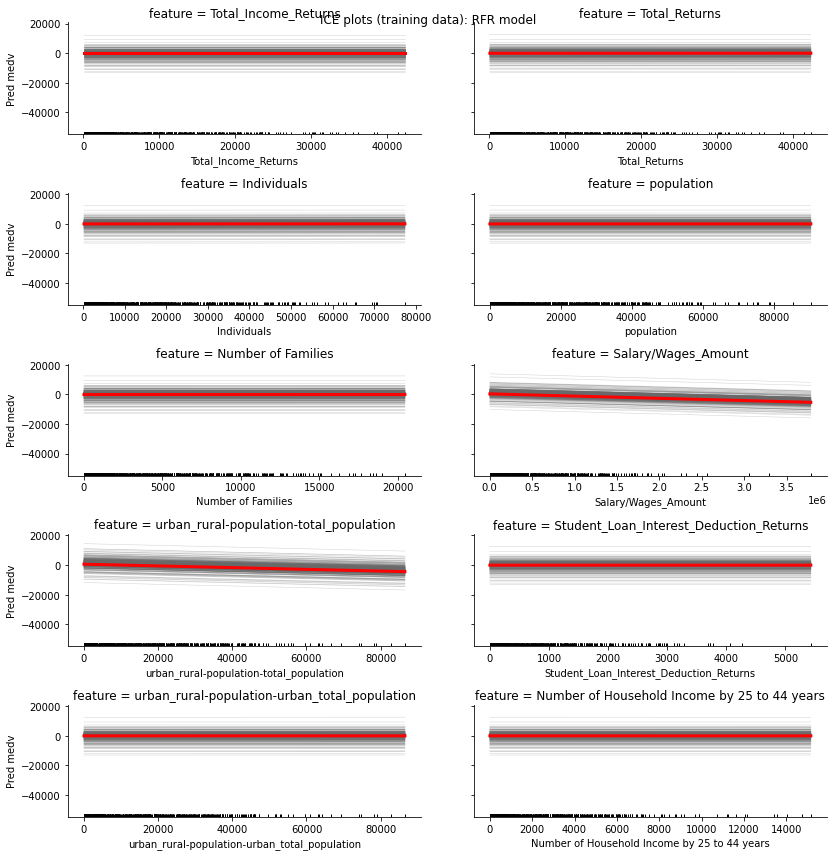

In [ ]:
# columns to plot
features = pdp_clean_m1R.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=pdp_clean_m1R, column=feat, predict=Model1R.predict) for feat in features} #For first 10 important features

plot_ice_grid(train_ice_dfs, pdp_clean_m1R, features, #plots
                    ax_ylabel='Pred medv', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
#plt.ylim([0,1]) #setting Y limits
plt.suptitle('ICE plots (training data): RFR model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

### Model 2

In [ ]:
pdp_clean_M2R = pdp_clean_M2R.sample(n =1000) #Subsetting 100 rows

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

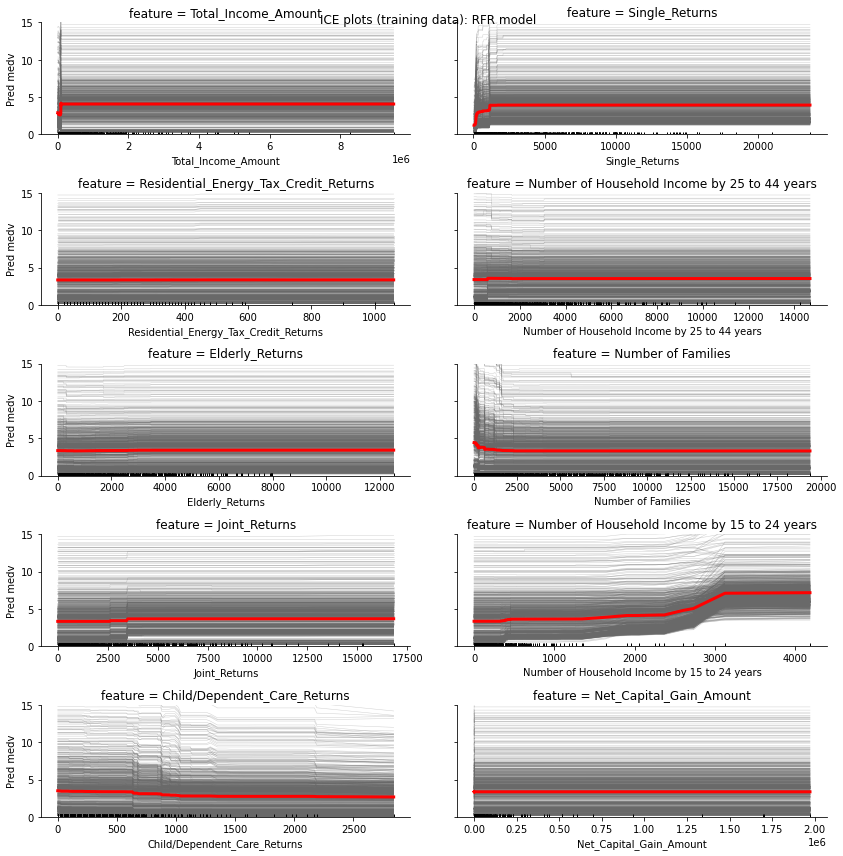

In [ ]:
# columns to plot
features = pdp_clean_M2R.columns #

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=pdp_clean_M2R, column=feat, predict=Model2R.predict) for feat in features}

plot_ice_grid(train_ice_dfs, pdp_clean_M2R, features,
                    ax_ylabel='Pred medv', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,15])
plt.suptitle('ICE plots (training data): RFR model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

### Model 3

In [ ]:
 pdp_clean_M3R = pdp_clean_M3R.sample(n =1000) 

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestRegressor was fitted with feat

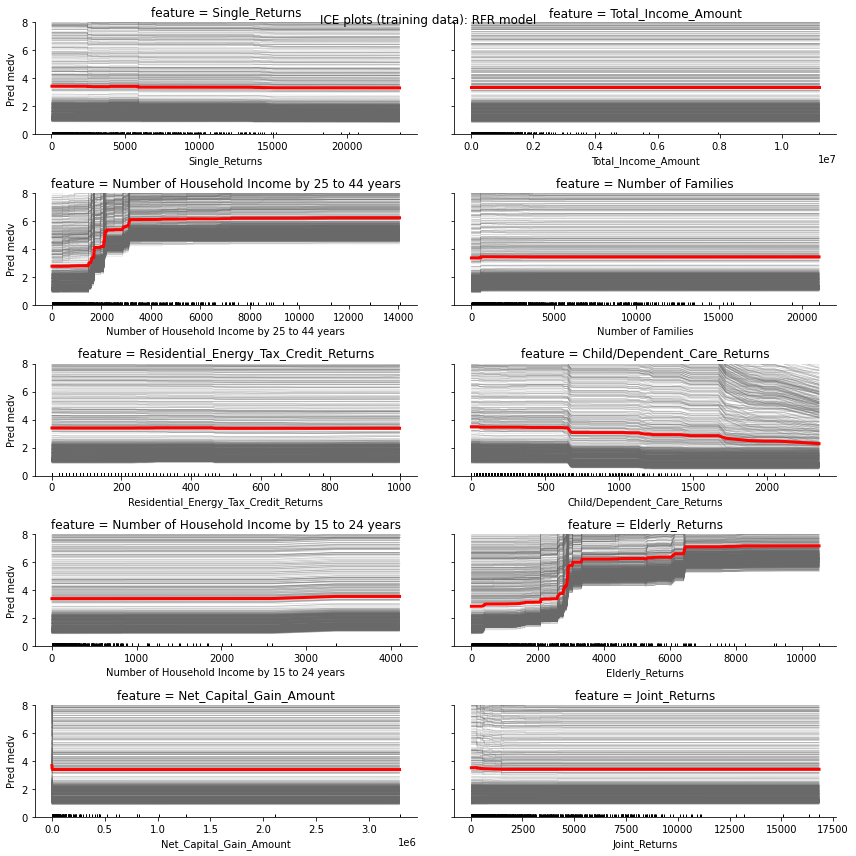

In [ ]:
# columns to plot
features = pdp_clean_M3R.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=pdp_clean_M3R, column=feat, predict=Model3R.predict) for feat in features}

plot_ice_grid(train_ice_dfs, pdp_clean_M3R, features,
                    ax_ylabel='Pred medv', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,8])
plt.suptitle('ICE plots (training data): RFR model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

### Classification

### Model 1

In [ ]:
pdp_clean_M1C = pdp_clean_M1C.sample(n =1000)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  "X 

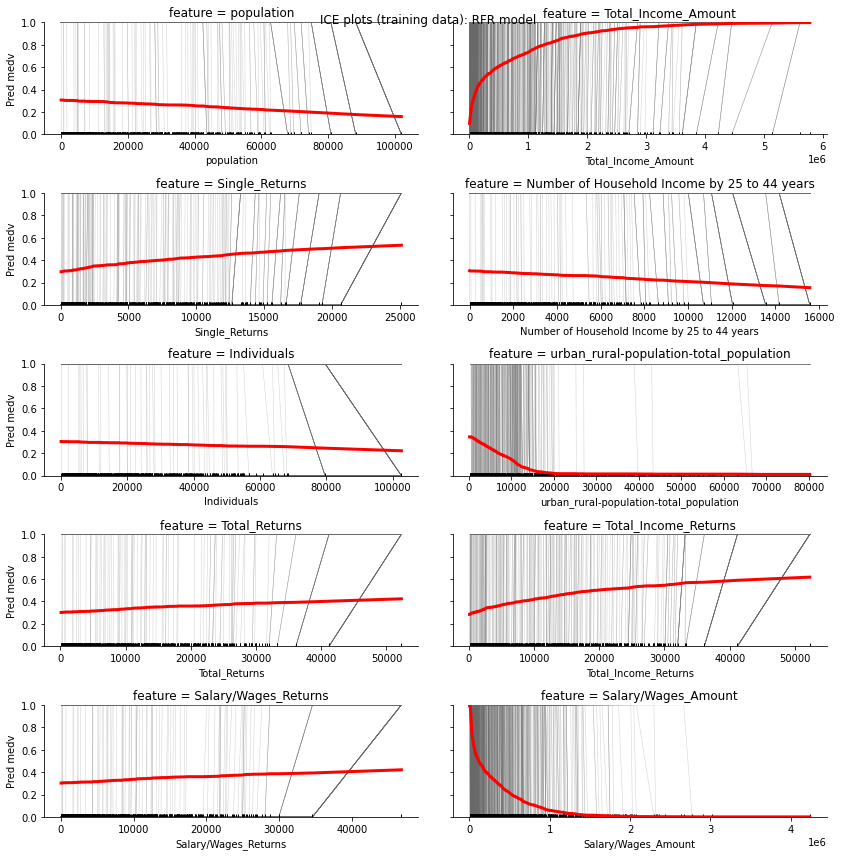

In [ ]:
# columns to plot
features = pdp_clean_M1C.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=pdp_clean_M1C, column=feat, predict=Model1C.predict) for feat in features}

plot_ice_grid(train_ice_dfs, pdp_clean_M1C, features,
                    ax_ylabel='Pred medv', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1])
plt.suptitle('ICE plots (training data): RFR model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

### Model 2

In [ ]:
pdp_clean_M2C = pdp_clean_M2C.sample(n =1000)

/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with feature names
  "X does not have valid feature names, but"
/usr/local/lib/python3.7/dist-packages/sklearn/base.py:451: UserWarning: X does not have valid feature names, but RandomForestClassifier was fitted with

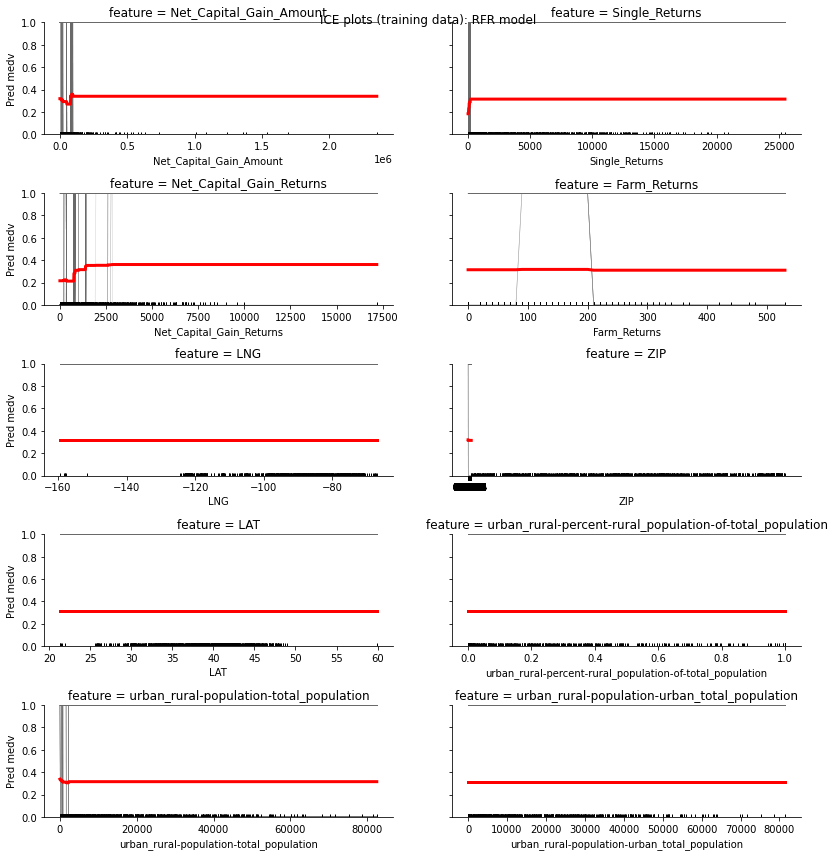

In [ ]:
# columns to plot
features = pdp_clean_M2C.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=pdp_clean_M2C, column=feat, predict=Model2C.predict) for feat in features}

plot_ice_grid(train_ice_dfs, pdp_clean_M2C, features,
                    ax_ylabel='Pred medv', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1])
plt.suptitle('ICE plots (training data): RFR model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

### Model 3

In [ ]:
pdp_clean_M3C = pdp_clean_M3C.sample(n = 500)

In [ ]:
# columns to plot
features = pdp_clean_M3C.columns

# create dict of ICE data for grid of ICE plots
train_ice_dfs = {feat: ice(data=pdp_clean_M3C, column=feat, predict=Model3C.predict) for feat in features}

plot_ice_grid(train_ice_dfs, pdp_clean_M3C, features,
                    ax_ylabel='Pred medv', alpha=0.3, plot_pdp=True,
                    pdp_kwargs={'c': 'red', 'linewidth': 3},
                    linewidth=0.5, c='dimgray')
plt.ylim([0,1])
plt.suptitle('ICE plots (training data): RFR model')
plt.subplots_adjust(top=0.89)
plt.tight_layout()

## Findings (10 pts)

(10 pts) Describe what you see - we want 5 to 10 really descriptive bullets here that describe what you think the drivers of EV charging locations are. 


*   From the permutation feature importance, we were able to identify the key variables which will improve the prediction accuracy of the models.
Even though this approach breaks the link between the feature and the goal, the model score drops, indicating how dependent the model is on the feature.

*   Reoccuring features in different models will be the significant drivers of EV Charging stations in different zipcodes.


*   We can notice that as the total income of the house hold or Elderly returns increases, there is raise in EV station usage, therefore EV station count can be increased as per avg income value of the residents
 
*   The number of charging stations is varying in different zipcodes as few features like number of families and number of household income 25 - 44 years and Total Income are influencing the presence of electric vechiles and stations.

*   The partial dependence portrayed how the prediction changes with the change in each value of column, demonstrates the relationship between the target response and a set of relevant input features, marginalizing all other input features' values The partial dependency may be thought of as the predicted target response as a function of the input attributes of interest.

*   The ICE plots shows how the prediction of binary classification of having Electric charging station increased as total returns, single_returns and number of household income for 25-44 years increases.

*   Net capital gain retun value is also contributing to the residents utilization of EV charging stations.

*   This shows how the population of having a range of returns are likely to have a Electric vechile and certainly those zipcodes need EV charging station.

* We also noticed that as child dependent retuns increases, the number of EV charging points decreases

* Though there are more population and area in many other states, most of the EV charging stations are concentrated in California due to high EV usage.

# Modeling Suggestions (optional, but recommended)

*   Fit one more model that only uses the top 10 or 20 variables and see if you get the same fit with the simpler model.
*   Repeat for both target variables.



# Conclusion (5 pts)

*  To analyse the requirement of EV stations in any particular location, the organisation or Governament can check on the following fields according to our analysis

    1.   List item
    2.   List item


*  These analysis can help the organisation to put the charging station at the right location, that could be used efficiently and increase the business value. Also, the government will be able to effectively build an infrastructure that can accommodate the increased demand for electric vehicle charging stations.

*  Residents whose age is ranging between 25-44 years might be more interested in having the Electric vechiles as the technology is developing, this can be also helpful for marketing the vehicles.

*  The top ten zip codes with the most electric vehicle charging stations are all in California. This result is not surprising.California is the most richest state in USA with high household income and GDP. It is also the most populous state in the US.  So we can take population and income level as key attributes while deciding to establish a new EV charging station. **[10]**


* Alaska, being the biggest state by Area in USA have least number of Electric vehicle charging stations, as there is very less population of 7 million. By this we can say that the EV companies are concerned about usage in order to include EV stations in the state. when we have less population but wide area, its difficlut to establish EV charging stations while maintaining commercial values. **[11]**


# Citations

1. "Light Duty Electric Drive Vehicles Monthly Sales Updates" (https://www.anl.gov/es/light-duty-electric-drive-vehicles-monthly-sales-updates)


2. "Study: Two-thrids of Americans don't want an EV yet, and half won't pay extra for electrified" (https://www.greencarreports.com/news/1134702_americans-dont-want-ev-yet-half-wont-pay-extra-for-electrified#:~:text=The%20lack%20of%20interest%20in,respondents%2C%20according%20to%20the%20study)


3. "Estimating the economic impact of electric vehicle charging stations"  (https://www.anl.gov/article/estimating-the-economic-impact-of-electric-vehicle-charging-stations)


4. "How Many Tesla Charging Stations are in the US?" (https://getoptiwatt.com/blog/how-many-tesla-charging-stations-are-in-the-us)


5. "New partnership between Blink, ChargePoint and EVgo lets you access all 3 charging networks with a single account" (https://electrek.co/2015/11/19/new-partnership-between-blink-chargepoint-and-evgo-lets-you-access-all-3-charging-networks-with-a-single-account/)


6. "The Average Costs of using Car Charging Stations" (https://www.mach1services.com/costs-of-using-car-charging-stations/)


7. "Free EV Charging Stations: 4 Easy Options" (https://www.findthebestcarprice.com/free-ev-charging/)



8. "Manhattan, New York EV Charging Station Info" (https://chargehub.com/en/countries/united-states/new-york/manhattan.html)


9. "Factbox: Five facts on the state of the U.S. electric vehicle charging network" (https://www.reuters.com/world/us/five-facts-state-us-electric-vehicle-charging-network-2021-09-01/)



10. "California is the Richest state in United states" (https://worldpopulationreview.com/state-rankings/richest-states-in-usa)


11. "Alaska state population and Area details" (https://en.wikipedia.org/wiki/Alaska)